In [84]:
import requests
import datetime as dt
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
import numpy as np

Edit tickers, target and datetime is necessary.

In [85]:
tickers = ['AAPL', 'TSLA', 'GOOG', 'TWTR'] 
target = 'AMZN'
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2021, 1, 1)

main_df = pd.DataFrame
for ticker in tickers:
    if ticker not in target: 
        df = web.DataReader(ticker, 'yahoo', start, end)
        df = df[['Adj Close']]
        df.rename(columns={'Adj Close': ticker}, inplace=True)
    if main_df.empty: 
        main_df = df
    else: 
        main_df = main_df.join(df, how='outer')

main_df.head()

AAPL       TSLA        GOOG       TWTR
Date                                                   
2015-01-02  24.861401  43.862000  523.373108  36.560001
2015-01-05  24.161013  42.018002  512.463013  36.380001
2015-01-06  24.163294  42.256001  500.585632  38.759998
2015-01-07  24.502111  42.189999  499.727997  37.279999
2015-01-08  25.443539  42.124001  501.303680  39.090000

Now we create and select our features for our target stock.

Features stored/created:

* Adjusted Close	
* Moving average	
* Increase in volume	
* Increase in adjusted close


In [86]:
target_df = web.DataReader(target, 'yahoo', start, end)

#calculate the moving average for a feature
target_df['Moving_av'] = target_df['Adj Close'].rolling(window=50, min_periods=0).mean()

#Calculate the rate of increase in volume and rate of increase in adjusted close 
i = 1
rate_increase_in_vol = [0]
rate_increase_in_adj_close = [0]

while i < len(target_df):
    rate_increase_in_vol.append(target_df.iloc[i]['Volume']-target_df.iloc[i - 1]['Volume'])
    rate_increase_in_adj_close.append(target_df.iloc[i]['Adj Close']-target_df.iloc[i - 1]['Adj Close'])
    i += 1

target_df['Increase_in_vol'] = rate_increase_in_vol
target_df['Increase_in_adj_close'] = rate_increase_in_adj_close    

Execute to join the target stock's features with the other tickers specified earlier.

In [87]:
main_df = main_df.join(target_df, how='outer')
main_df.head()

AAPL       TSLA        GOOG       TWTR        High  \
Date                                                                  
2015-01-02  24.861401  43.862000  523.373108  36.560001  314.750000   
2015-01-05  24.161013  42.018002  512.463013  36.380001  308.380005   
2015-01-06  24.163294  42.256001  500.585632  38.759998  303.000000   
2015-01-07  24.502111  42.189999  499.727997  37.279999  301.279999   
2015-01-08  25.443539  42.124001  501.303680  39.090000  303.140015   

                   Low        Open       Close   Volume   Adj Close  \
Date                                                                  
2015-01-02  306.959991  312.579987  308.519989  2783200  308.519989   
2015-01-05  300.850006  307.010010  302.190002  2774200  302.190002   
2015-01-06  292.380005  302.239990  295.290009  3519000  295.290009   
2015-01-07  295.329987  297.500000  298.420013  2640300  298.420013   
2015-01-08  296.109985  300.320007  300.459991  3088400  300.459991   

             Moving_av  Increase_in_vol  Increase_in_adj_close  
Date                                                            
2015-01-02  308.519989              0.0               0.000000  
2015-01-05  305.354996          -9000.0              -6.329987  
2015-01-06  302.000000         744800.0              -6.899994  
2015-01-07  301.105003        -878700.0               3.130005  
2015-01-08  300.976001         448100.0               2.039978

Adding a column preclose to each day, that holds the closing value for the previous day.

In [88]:
main_df['PrevClose'] = main_df['Close'].shift(1)

#changing key to integers
key = np.array(np.arange(0, len(main_df)))
main_df.set_index(key) 

#creating a col for the return values [(close - prev close)/prev close]
main_df['Return'] = (main_df['Close'] - main_df['PrevClose'])/main_df['PrevClose']
main_df.head()

AAPL       TSLA        GOOG       TWTR        High  \
Date                                                                  
2015-01-02  24.861401  43.862000  523.373108  36.560001  314.750000   
2015-01-05  24.161013  42.018002  512.463013  36.380001  308.380005   
2015-01-06  24.163294  42.256001  500.585632  38.759998  303.000000   
2015-01-07  24.502111  42.189999  499.727997  37.279999  301.279999   
2015-01-08  25.443539  42.124001  501.303680  39.090000  303.140015   

                   Low        Open       Close   Volume   Adj Close  \
Date                                                                  
2015-01-02  306.959991  312.579987  308.519989  2783200  308.519989   
2015-01-05  300.850006  307.010010  302.190002  2774200  302.190002   
2015-01-06  292.380005  302.239990  295.290009  3519000  295.290009   
2015-01-07  295.329987  297.500000  298.420013  2640300  298.420013   
2015-01-08  296.109985  300.320007  300.459991  3088400  300.459991   

             Moving_av  Increase_in_vol  Increase_in_adj_close   PrevClose  \
Date                                                                         
2015-01-02  308.519989              0.0               0.000000         NaN   
2015-01-05  305.354996          -9000.0              -6.329987  308.519989   
2015-01-06  302.000000         744800.0              -6.899994  302.190002   
2015-01-07  301.105003        -878700.0               3.130005  295.290009   
2015-01-08  300.976001         448100.0               2.039978  298.420013   

              Return  
Date                  
2015-01-02       NaN  
2015-01-05 -0.020517  
2015-01-06 -0.022833  
2015-01-07  0.010600  
2015-01-08  0.006836

In [89]:
from datetime import datetime

sent_df = pd.read_csv('AMZN_avg_sent.csv')
dates = []
for i in sent_df['date']:
    dates.append(datetime.strptime(i, '%m/%d/%y'))

#convert sentiment datafram to match format of main_df so they can be joined on date
dates = np.array((dates))
dates = pd.DataFrame(dates)
dates.set_index(0)
sent_df['dates'] = dates
sent_df = sent_df[['sent', 'dates']]
sent_df = sent_df.set_index('dates')
main_df = main_df.join(sent_df, how='inner')
main_df.head()

AAPL       TSLA        GOOG       TWTR        High  \
2015-01-02  24.861401  43.862000  523.373108  36.560001  314.750000   
2015-01-05  24.161013  42.018002  512.463013  36.380001  308.380005   
2015-01-06  24.163294  42.256001  500.585632  38.759998  303.000000   
2015-01-07  24.502111  42.189999  499.727997  37.279999  301.279999   
2015-01-08  25.443539  42.124001  501.303680  39.090000  303.140015   

                   Low        Open       Close   Volume   Adj Close  \
2015-01-02  306.959991  312.579987  308.519989  2783200  308.519989   
2015-01-05  300.850006  307.010010  302.190002  2774200  302.190002   
2015-01-06  292.380005  302.239990  295.290009  3519000  295.290009   
2015-01-07  295.329987  297.500000  298.420013  2640300  298.420013   
2015-01-08  296.109985  300.320007  300.459991  3088400  300.459991   

             Moving_av  Increase_in_vol  Increase_in_adj_close   PrevClose  \
2015-01-02  308.519989              0.0               0.000000         NaN   
2015-01-05  305.354996          -9000.0              -6.329987  308.519989   
2015-01-06  302.000000         744800.0              -6.899994  302.190002   
2015-01-07  301.105003        -878700.0               3.130005  295.290009   
2015-01-08  300.976001         448100.0               2.039978  298.420013   

              Return      sent  
2015-01-02       NaN  0.026933  
2015-01-05 -0.020517  0.042016  
2015-01-06 -0.022833  0.044505  
2015-01-07  0.010600  0.047204  
2015-01-08  0.006836  0.050522

In [90]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [91]:
input_cols = []
target_col = 'Return'
exclude = ['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Moving_av', 'Increase_in_vol', "Increase_in_adj_close"]

for col in main_df.columns:
    if col != target_col and col not in exclude:
        input_cols.append(col)
        
inputs = main_df[input_cols].values[1:]
targets = main_df[target_col].values[1:]

In [92]:
T = 10 #how many days we look back to predict the next day
D = inputs.shape[1] #number of features
N = len(inputs) - T

In [93]:
Ntrain = len(inputs) * 2//3
scaler = StandardScaler()
scaler.fit(inputs[:Ntrain + T - 1])
inputs = scaler.transform(inputs)

In [94]:
X_train = np.zeros((Ntrain, T, D))
y_train = np.zeros(Ntrain)

for t in range(Ntrain):
    X_train[t,:,:] = inputs[t:t+T]
    y_train[t] = (targets[t + T] > 0)
    

In [95]:
X_test = np.zeros((N - Ntrain, T, D))
y_test = np.zeros(N - Ntrain)

for i in range(N - Ntrain):
    t = i + Ntrain
    X_test[i,:,:] = inputs[t:t+T]
    y_test[i] = (targets[t + T] > 0)
    


In [96]:
hidden = np.arange(0, 101, 5)
learning_rates = [.1, .01, .001, .0001, .00001]
# epochs = 100, 150, 200

In [ ]:
i = Input(shape=(T,D))
results = {}
c = 0

for hdn in hidden:
    for l in learning_rates:
        x = LSTM(hdn)(i) 
        x = Dense(1, activation='sigmoid')(x)
        model = Model(i, x)
        model.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=l), #hyper parameter
            metrics=['accuracy']
        )
        r = model.fit(
            X_train, 
            y_train,
            epochs = 100, 
            batch_size = 32,
            validation_data = (X_test, y_test)
        )
        results[c] = [r, hdn, l]
        c += 1

Epoch 1/100
27/27 [==============================] - 2s 24ms/step - loss: 0.6931 - accuracy: 0.4389 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4436 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4606 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4439 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4321 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4670 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4528 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 8/100


Epoch 59/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4539 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 60/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4480 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 61/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4425 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 62/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4598 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 63/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4482 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 64/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4570 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 65/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4224 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 

Epoch 17/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4499 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 18/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4774 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 19/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4397 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 20/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4287 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 21/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4369 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 22/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4300 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 23/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4467 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 

Epoch 75/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4552 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 76/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4401 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 77/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4487 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 78/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4433 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 79/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4245 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 80/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4301 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 81/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 

Epoch 33/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4583 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 34/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4540 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 35/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4523 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 36/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4550 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 37/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4322 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 38/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4069 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 39/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4346 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 

Epoch 91/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4575 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 92/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4528 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 93/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4316 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 94/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4433 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 95/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4482 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 96/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4475 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 97/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4301 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 

Epoch 49/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4539 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 50/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4498 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 51/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4434 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 52/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4722 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 53/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 54/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4417 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 55/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4587 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 

Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4597 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4351 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4419 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4453 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 11/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4336 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 12/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 13/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4505 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 14/

Epoch 65/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4560 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 66/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4496 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 67/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4344 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 68/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4454 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 69/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4695 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 70/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4135 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 71/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4413 - val_loss: 0.6931 - val_accuracy: 0.4597
Epoch 

Epoch 23/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.5716 - val_loss: 0.6986 - val_accuracy: 0.5403
Epoch 24/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5735 - val_loss: 0.6954 - val_accuracy: 0.5403
Epoch 25/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6793 - accuracy: 0.5588 - val_loss: 0.7007 - val_accuracy: 0.5403
Epoch 26/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.5906 - val_loss: 0.7079 - val_accuracy: 0.5403
Epoch 27/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.5815 - val_loss: 0.7021 - val_accuracy: 0.5403
Epoch 28/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.6014 - val_loss: 0.7076 - val_accuracy: 0.5403
Epoch 29/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.5698 - val_loss: 0.7056 - val_accuracy: 0.5403
Epoch 

Epoch 81/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.6184 - val_loss: 0.7533 - val_accuracy: 0.5403
Epoch 82/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6431 - accuracy: 0.6342 - val_loss: 0.7562 - val_accuracy: 0.5403
Epoch 83/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.5683 - val_loss: 0.7402 - val_accuracy: 0.5403
Epoch 84/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6446 - accuracy: 0.6093 - val_loss: 0.7192 - val_accuracy: 0.5403
Epoch 85/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.6566 - val_loss: 0.7216 - val_accuracy: 0.5403
Epoch 86/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.5905 - val_loss: 0.7644 - val_accuracy: 0.5403
Epoch 87/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.6035 - val_loss: 0.7268 - val_accuracy: 0.5403
Epoch 

Epoch 39/100
27/27 [==============================] - 0s 19ms/step - loss: 0.6598 - accuracy: 0.6001 - val_loss: 0.6933 - val_accuracy: 0.5379
Epoch 40/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.5977 - val_loss: 0.6950 - val_accuracy: 0.5623
Epoch 41/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6067 - val_loss: 0.6940 - val_accuracy: 0.5501
Epoch 42/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.6129 - val_loss: 0.7025 - val_accuracy: 0.5477
Epoch 43/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.6187 - val_loss: 0.7026 - val_accuracy: 0.5379
Epoch 44/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6429 - accuracy: 0.6191 - val_loss: 0.7047 - val_accuracy: 0.5330
Epoch 45/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6610 - accuracy: 0.6042 - val_loss: 0.6981 - val_accuracy: 0.5355
Epoch

Epoch 97/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5535 - accuracy: 0.7204 - val_loss: 0.7495 - val_accuracy: 0.5012
Epoch 98/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5794 - accuracy: 0.6918 - val_loss: 0.7251 - val_accuracy: 0.5257
Epoch 99/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5691 - accuracy: 0.7229 - val_loss: 0.7349 - val_accuracy: 0.5330
Epoch 100/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5699 - accuracy: 0.7104 - val_loss: 0.7266 - val_accuracy: 0.5159
Epoch 1/100
27/27 [==============================] - 2s 18ms/step - loss: 0.7034 - accuracy: 0.4964 - val_loss: 0.7129 - val_accuracy: 0.4645
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.5061 - val_loss: 0.7088 - val_accuracy: 0.4572
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6996 - accuracy: 0.5104 - val_loss: 0.7048 - val_accuracy: 0.4548
Epoch 4

Epoch 55/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6792 - accuracy: 0.5842 - val_loss: 0.6901 - val_accuracy: 0.5403
Epoch 56/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5705 - val_loss: 0.6903 - val_accuracy: 0.5403
Epoch 57/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.5882 - val_loss: 0.6904 - val_accuracy: 0.5403
Epoch 58/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.5574 - val_loss: 0.6901 - val_accuracy: 0.5403
Epoch 59/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6788 - accuracy: 0.5571 - val_loss: 0.6903 - val_accuracy: 0.5403
Epoch 60/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6793 - accuracy: 0.5574 - val_loss: 0.6903 - val_accuracy: 0.5403
Epoch 61/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.5865 - val_loss: 0.6909 - val_accuracy: 0.5403
Epoch 

Epoch 13/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5311 - val_loss: 0.6954 - val_accuracy: 0.5257
Epoch 14/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.5263 - val_loss: 0.6956 - val_accuracy: 0.5330
Epoch 15/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.5132 - val_loss: 0.6958 - val_accuracy: 0.5330
Epoch 16/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5612 - val_loss: 0.6960 - val_accuracy: 0.5330
Epoch 17/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.5577 - val_loss: 0.6961 - val_accuracy: 0.5355
Epoch 18/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6910 - accuracy: 0.5377 - val_loss: 0.6964 - val_accuracy: 0.5403
Epoch 19/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6883 - accuracy: 0.5612 - val_loss: 0.6967 - val_accuracy: 0.5403
Epoch 

Number of Hidden Nodes = 0
Learning rate = 0.1


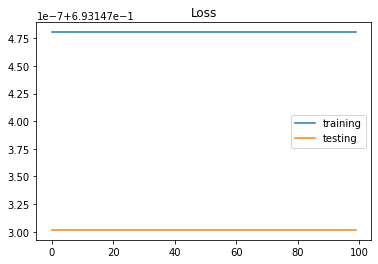

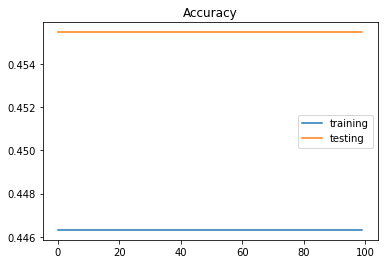


-----------------------------------------------------------------------

Number of Hidden Nodes = 0
Learning rate = 0.01


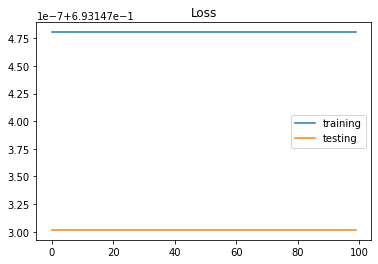

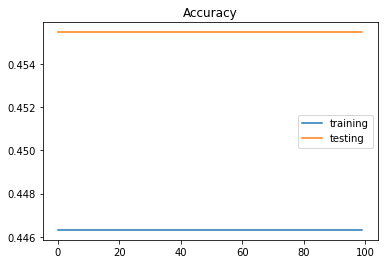


-----------------------------------------------------------------------

Number of Hidden Nodes = 0
Learning rate = 0.001


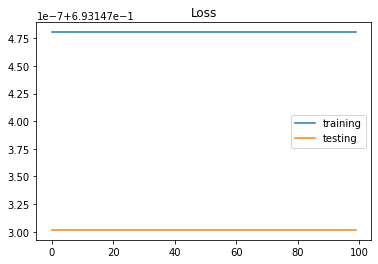

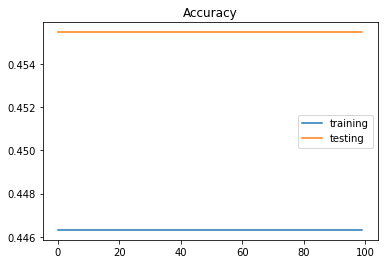


-----------------------------------------------------------------------

Number of Hidden Nodes = 0
Learning rate = 0.0001


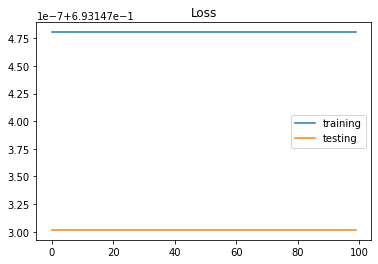

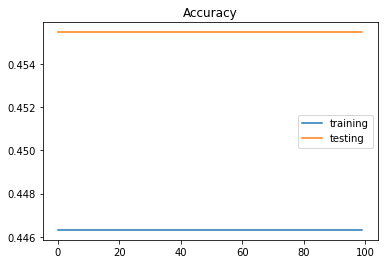


-----------------------------------------------------------------------

Number of Hidden Nodes = 0
Learning rate = 1e-05


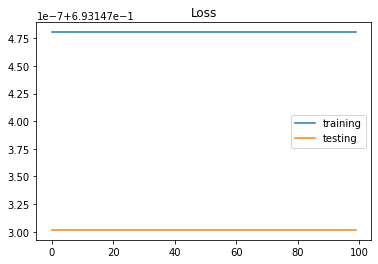

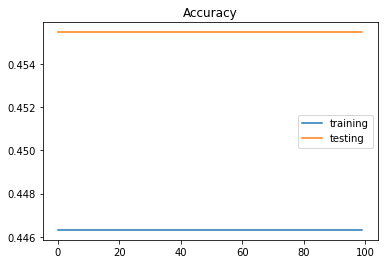


-----------------------------------------------------------------------

Number of Hidden Nodes = 5
Learning rate = 0.1


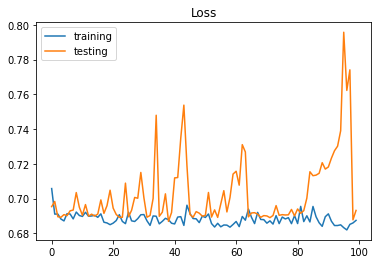

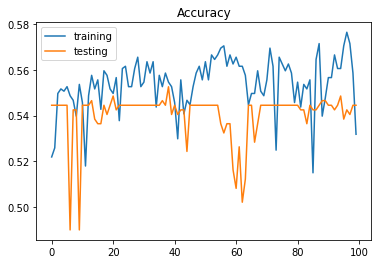


-----------------------------------------------------------------------

Number of Hidden Nodes = 5
Learning rate = 0.01


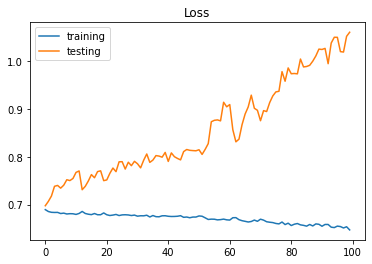

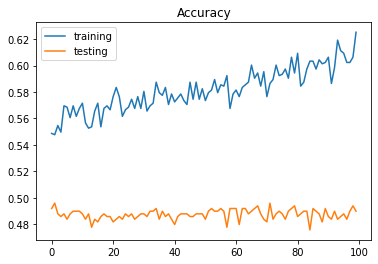


-----------------------------------------------------------------------

Number of Hidden Nodes = 5
Learning rate = 0.001


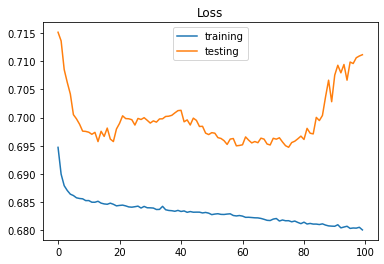

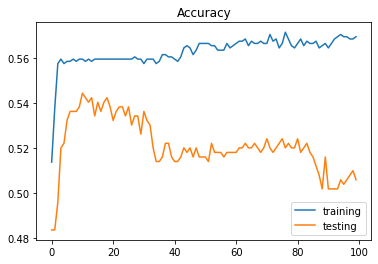


-----------------------------------------------------------------------

Number of Hidden Nodes = 5
Learning rate = 0.0001


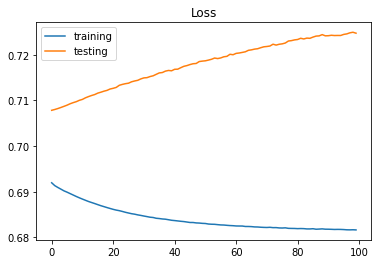

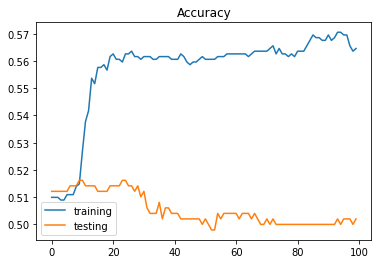


-----------------------------------------------------------------------

Number of Hidden Nodes = 5
Learning rate = 1e-05


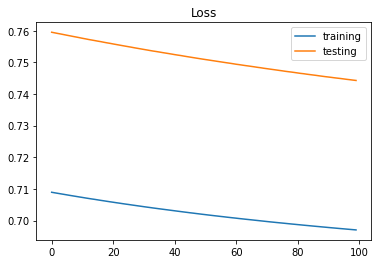

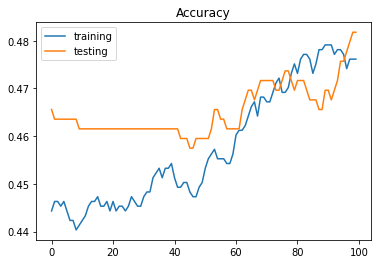


-----------------------------------------------------------------------

Number of Hidden Nodes = 10
Learning rate = 0.1


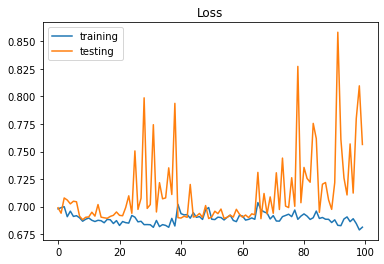

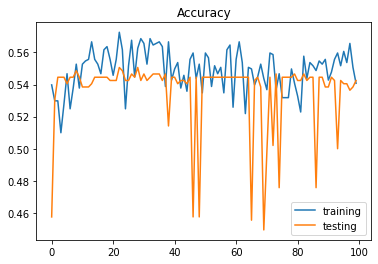


-----------------------------------------------------------------------

Number of Hidden Nodes = 10
Learning rate = 0.01


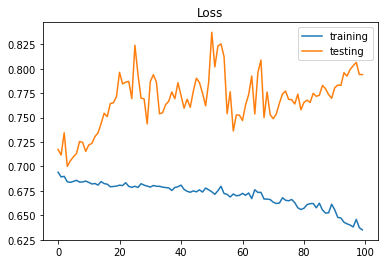

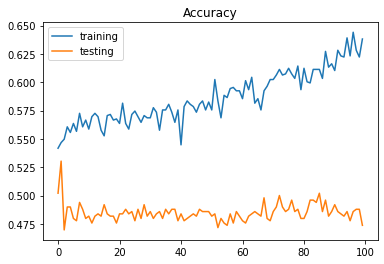


-----------------------------------------------------------------------

Number of Hidden Nodes = 10
Learning rate = 0.001


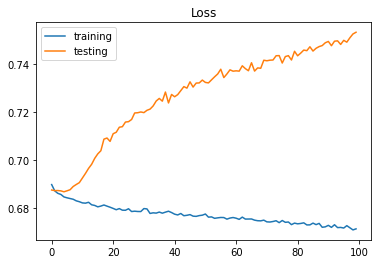

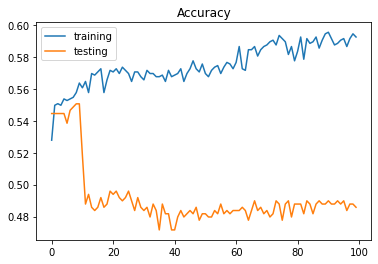


-----------------------------------------------------------------------

Number of Hidden Nodes = 10
Learning rate = 0.0001


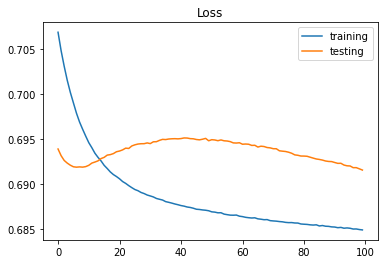

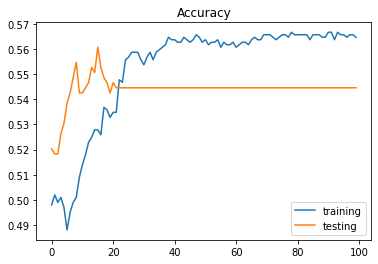


-----------------------------------------------------------------------

Number of Hidden Nodes = 10
Learning rate = 1e-05


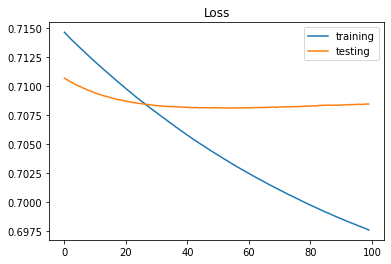

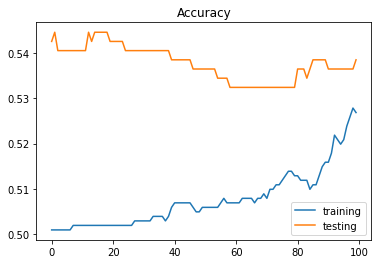


-----------------------------------------------------------------------

Number of Hidden Nodes = 15
Learning rate = 0.1


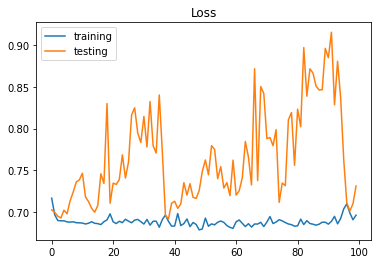

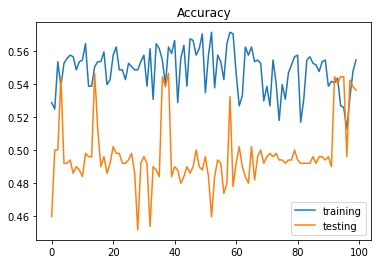


-----------------------------------------------------------------------

Number of Hidden Nodes = 15
Learning rate = 0.01


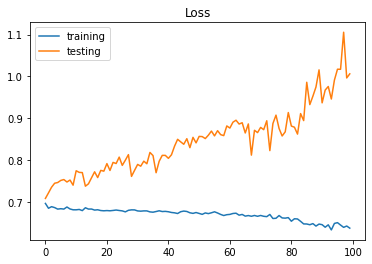

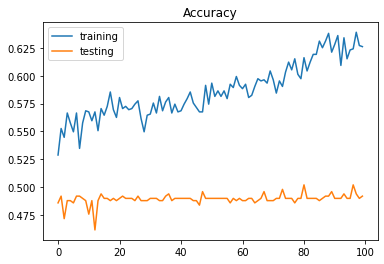


-----------------------------------------------------------------------

Number of Hidden Nodes = 15
Learning rate = 0.001


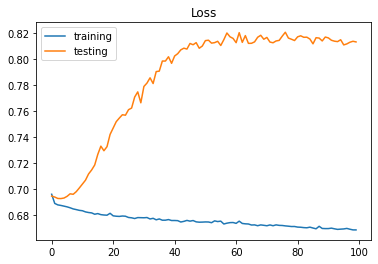

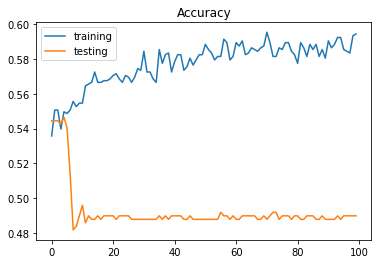


-----------------------------------------------------------------------

Number of Hidden Nodes = 15
Learning rate = 0.0001


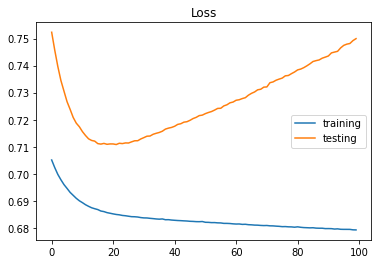

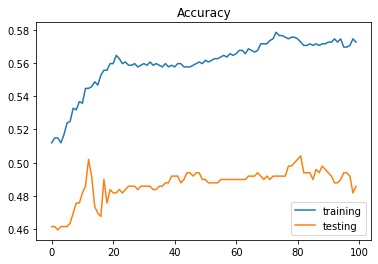


-----------------------------------------------------------------------

Number of Hidden Nodes = 15
Learning rate = 1e-05


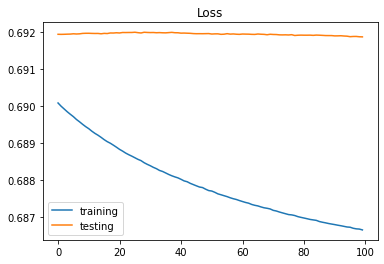

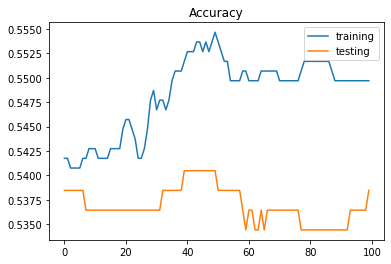


-----------------------------------------------------------------------

Number of Hidden Nodes = 20
Learning rate = 0.1


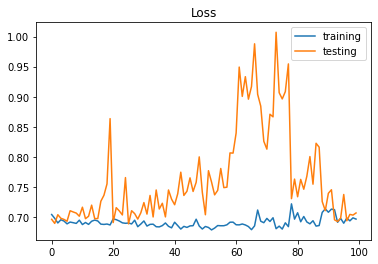

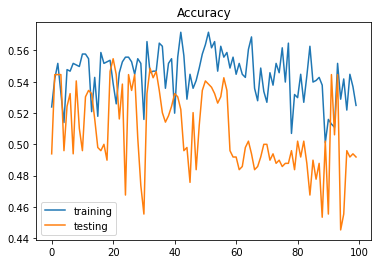


-----------------------------------------------------------------------

Number of Hidden Nodes = 20
Learning rate = 0.01


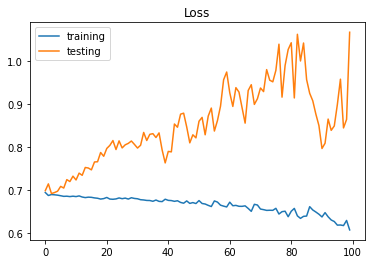

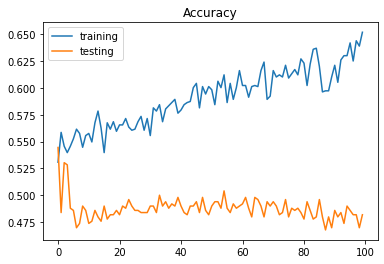


-----------------------------------------------------------------------

Number of Hidden Nodes = 20
Learning rate = 0.001


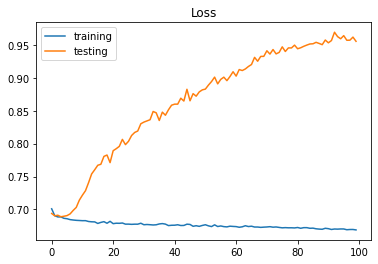

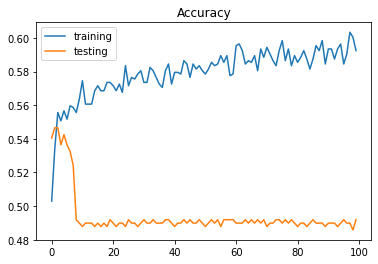


-----------------------------------------------------------------------

Number of Hidden Nodes = 20
Learning rate = 0.0001


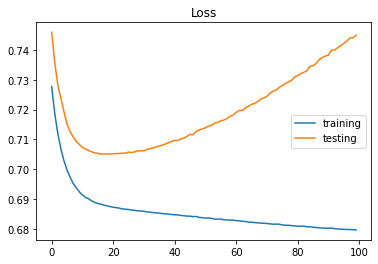

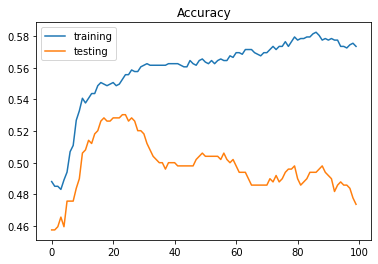


-----------------------------------------------------------------------

Number of Hidden Nodes = 20
Learning rate = 1e-05


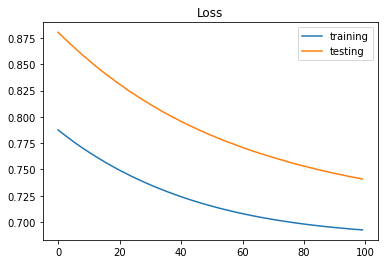

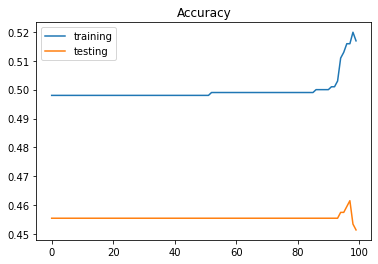


-----------------------------------------------------------------------

Number of Hidden Nodes = 25
Learning rate = 0.1


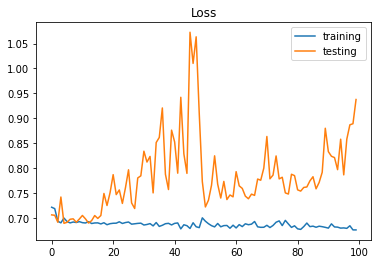

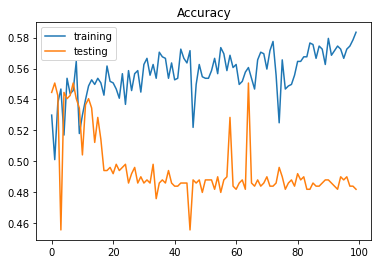


-----------------------------------------------------------------------

Number of Hidden Nodes = 25
Learning rate = 0.01


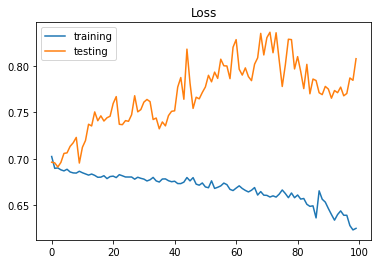

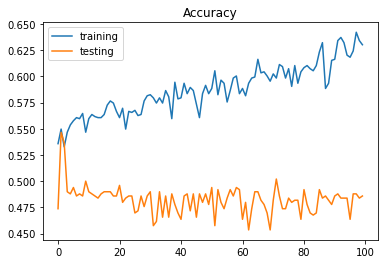


-----------------------------------------------------------------------

Number of Hidden Nodes = 25
Learning rate = 0.001


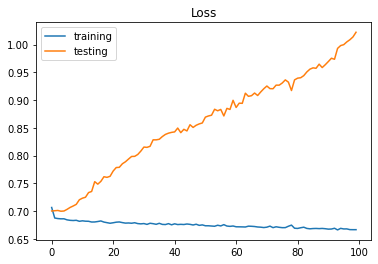

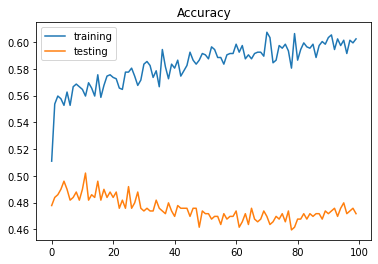


-----------------------------------------------------------------------

Number of Hidden Nodes = 25
Learning rate = 0.0001


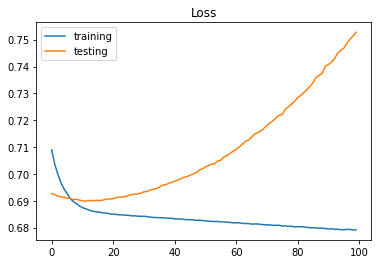

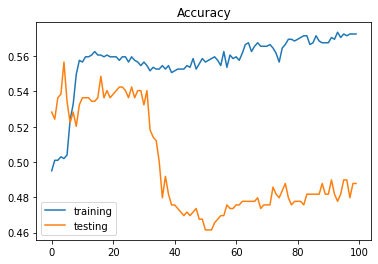


-----------------------------------------------------------------------

Number of Hidden Nodes = 25
Learning rate = 1e-05


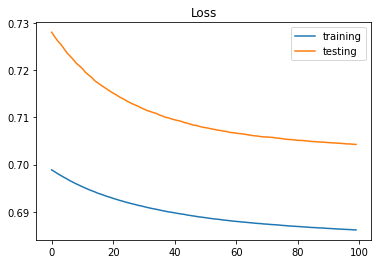

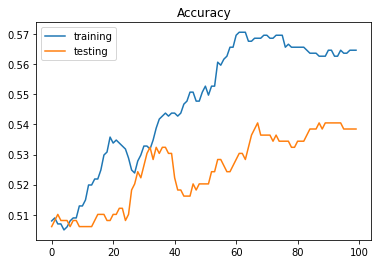


-----------------------------------------------------------------------

Number of Hidden Nodes = 30
Learning rate = 0.1


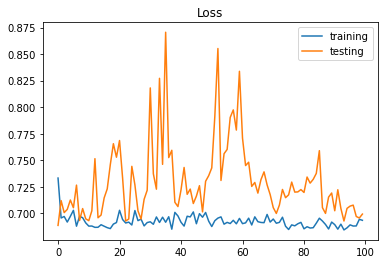

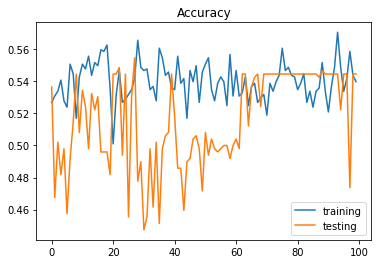


-----------------------------------------------------------------------

Number of Hidden Nodes = 30
Learning rate = 0.01


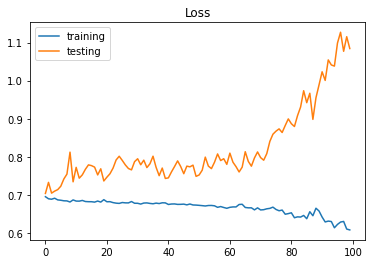

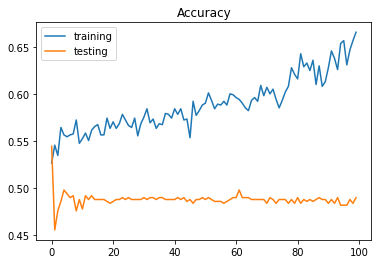


-----------------------------------------------------------------------

Number of Hidden Nodes = 30
Learning rate = 0.001


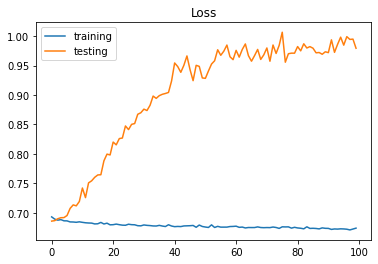

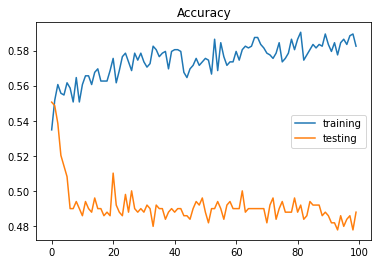


-----------------------------------------------------------------------

Number of Hidden Nodes = 30
Learning rate = 0.0001


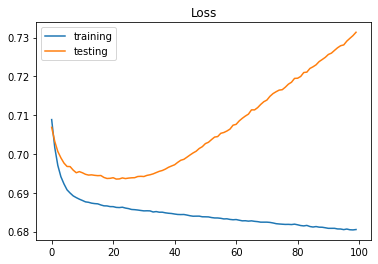

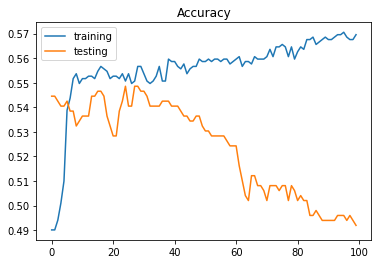


-----------------------------------------------------------------------

Number of Hidden Nodes = 30
Learning rate = 1e-05


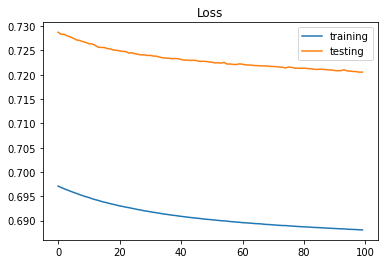

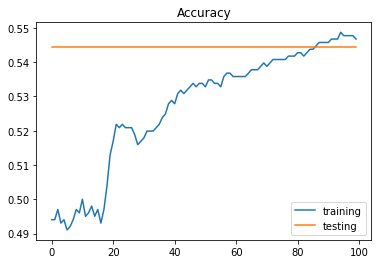


-----------------------------------------------------------------------

Number of Hidden Nodes = 35
Learning rate = 0.1


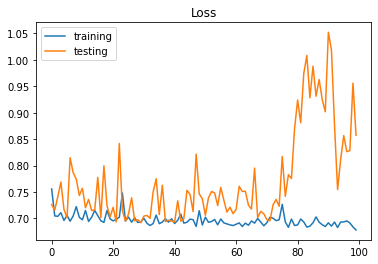

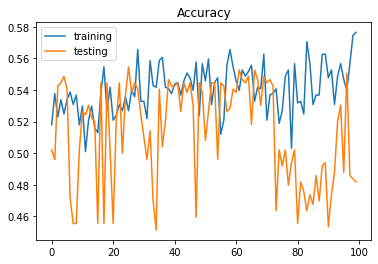


-----------------------------------------------------------------------

Number of Hidden Nodes = 35
Learning rate = 0.01


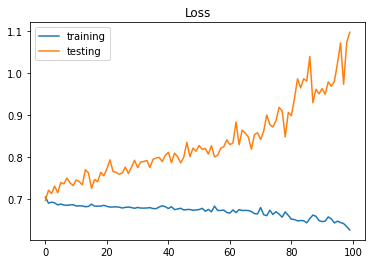

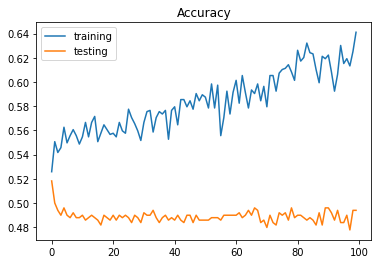


-----------------------------------------------------------------------

Number of Hidden Nodes = 35
Learning rate = 0.001


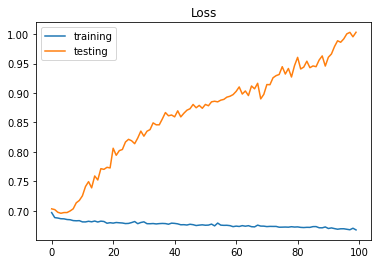

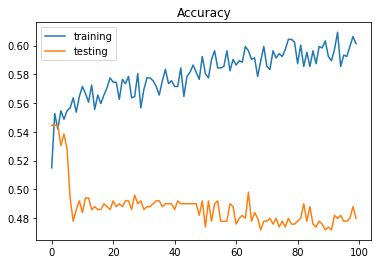


-----------------------------------------------------------------------

Number of Hidden Nodes = 35
Learning rate = 0.0001


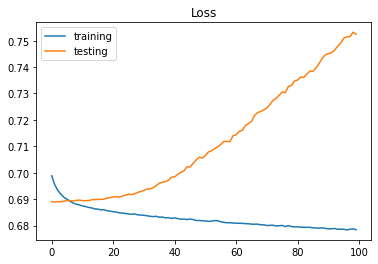

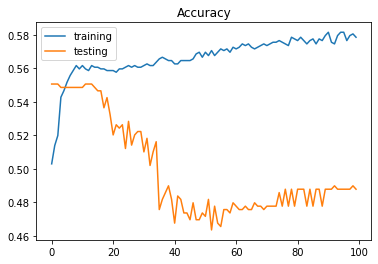


-----------------------------------------------------------------------

Number of Hidden Nodes = 35
Learning rate = 1e-05


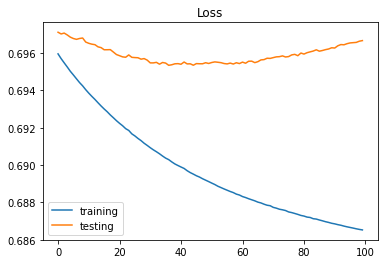

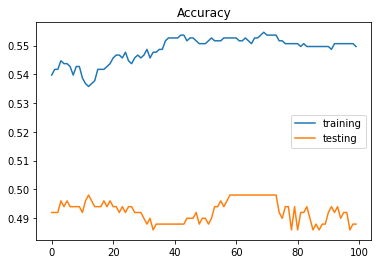


-----------------------------------------------------------------------

Number of Hidden Nodes = 40
Learning rate = 0.1


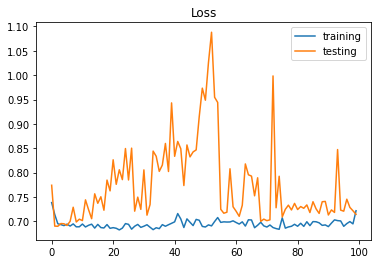

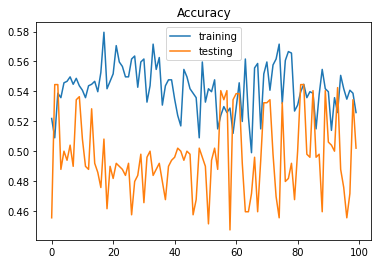


-----------------------------------------------------------------------

Number of Hidden Nodes = 40
Learning rate = 0.01


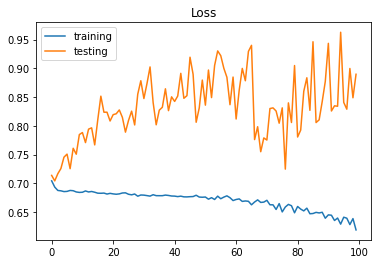

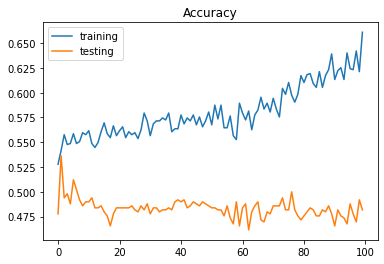


-----------------------------------------------------------------------

Number of Hidden Nodes = 40
Learning rate = 0.001


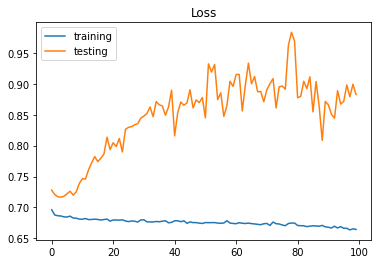

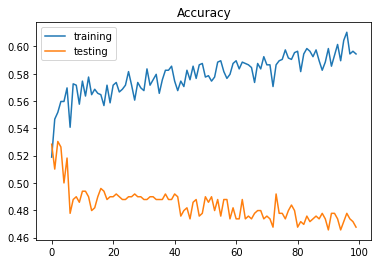


-----------------------------------------------------------------------

Number of Hidden Nodes = 40
Learning rate = 0.0001


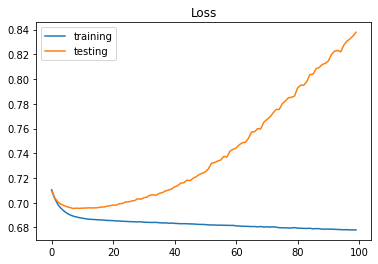

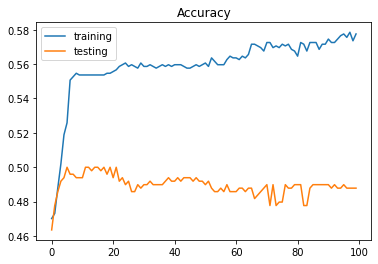


-----------------------------------------------------------------------

Number of Hidden Nodes = 40
Learning rate = 1e-05


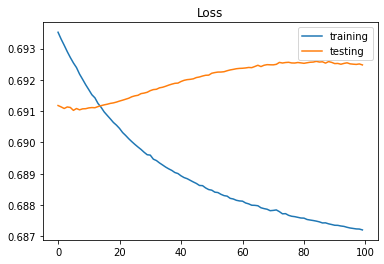

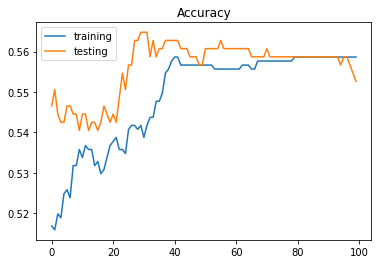


-----------------------------------------------------------------------

Number of Hidden Nodes = 45
Learning rate = 0.1


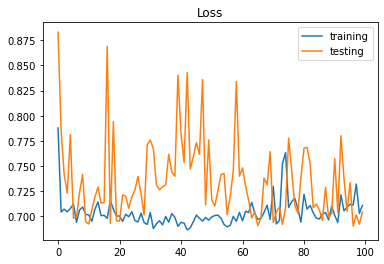

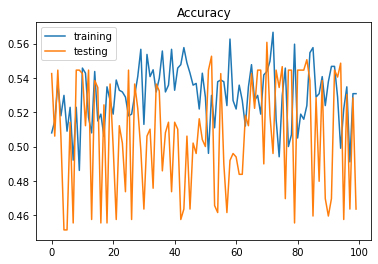


-----------------------------------------------------------------------

Number of Hidden Nodes = 45
Learning rate = 0.01


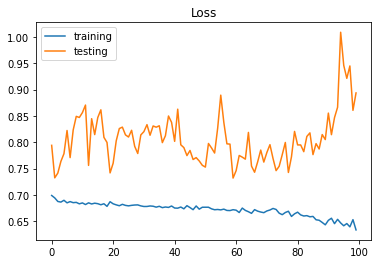

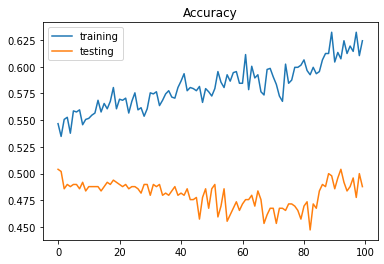


-----------------------------------------------------------------------

Number of Hidden Nodes = 45
Learning rate = 0.001


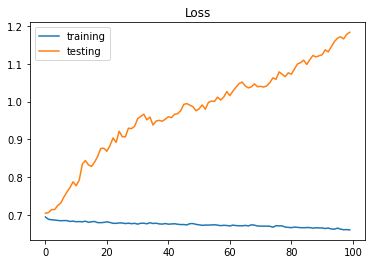

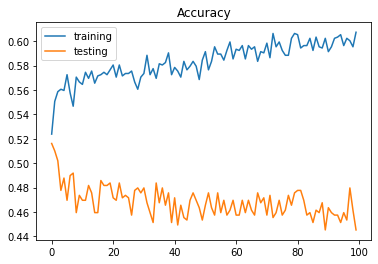


-----------------------------------------------------------------------

Number of Hidden Nodes = 45
Learning rate = 0.0001


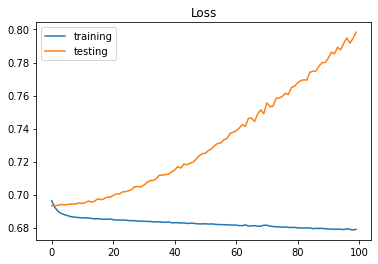

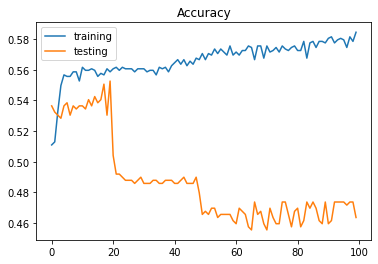


-----------------------------------------------------------------------

Number of Hidden Nodes = 45
Learning rate = 1e-05


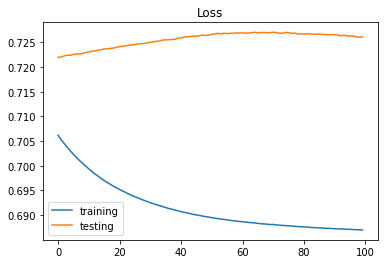

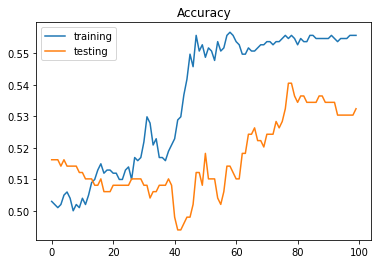


-----------------------------------------------------------------------

Number of Hidden Nodes = 50
Learning rate = 0.1


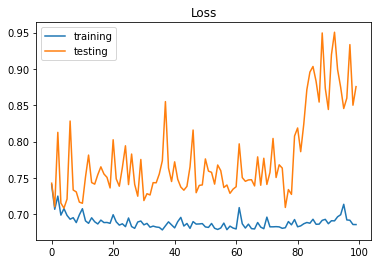

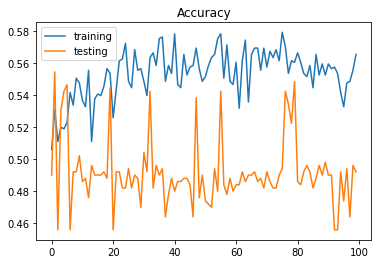


-----------------------------------------------------------------------

Number of Hidden Nodes = 50
Learning rate = 0.01


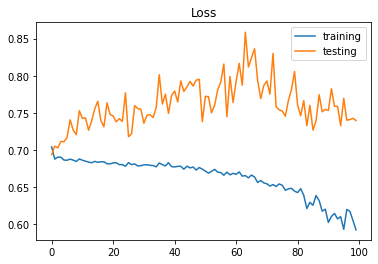

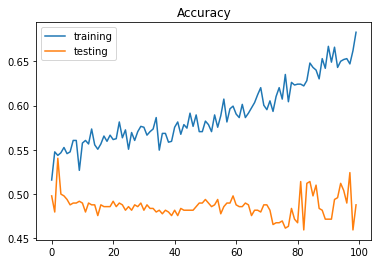


-----------------------------------------------------------------------

Number of Hidden Nodes = 50
Learning rate = 0.001


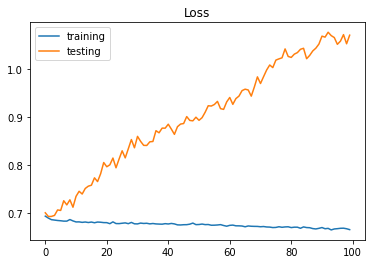

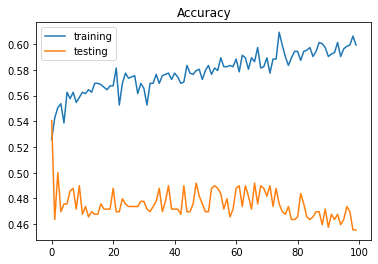


-----------------------------------------------------------------------

Number of Hidden Nodes = 50
Learning rate = 0.0001


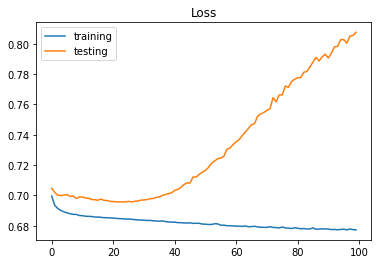

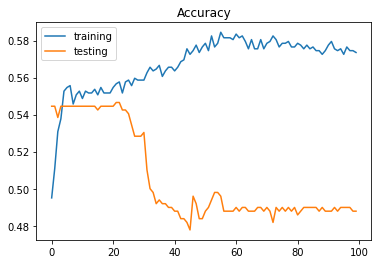


-----------------------------------------------------------------------

Number of Hidden Nodes = 50
Learning rate = 1e-05


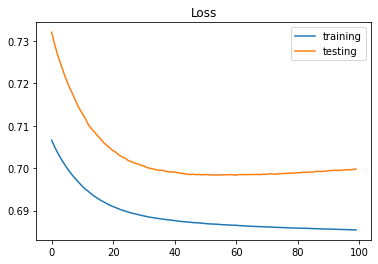

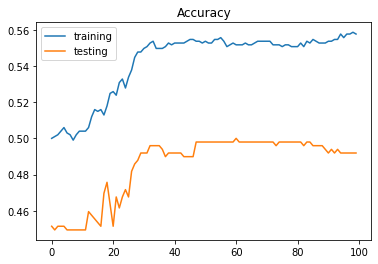


-----------------------------------------------------------------------

Number of Hidden Nodes = 55
Learning rate = 0.1


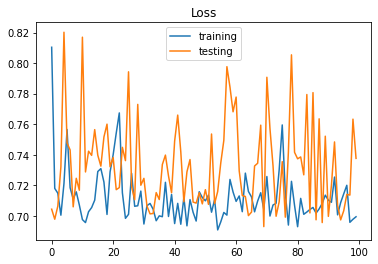

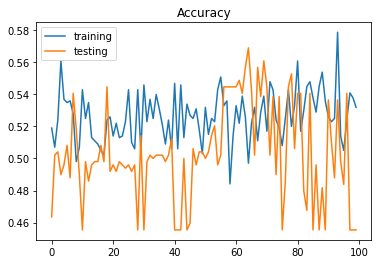


-----------------------------------------------------------------------

Number of Hidden Nodes = 55
Learning rate = 0.01


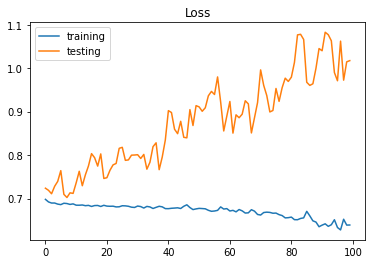

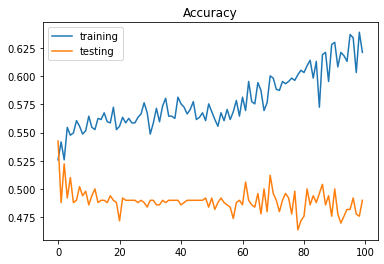


-----------------------------------------------------------------------

Number of Hidden Nodes = 55
Learning rate = 0.001


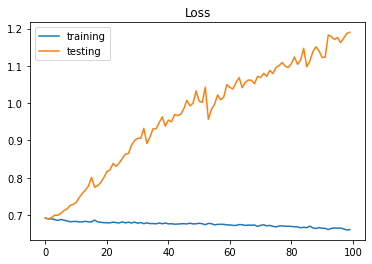

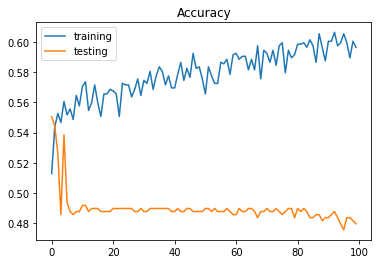


-----------------------------------------------------------------------

Number of Hidden Nodes = 55
Learning rate = 0.0001


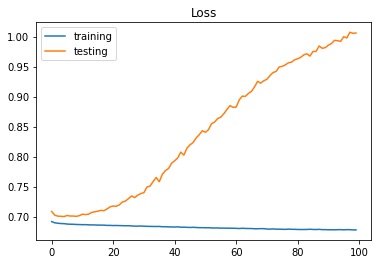

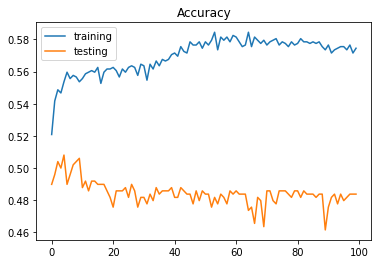


-----------------------------------------------------------------------

Number of Hidden Nodes = 55
Learning rate = 1e-05


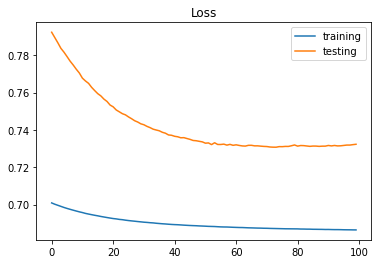

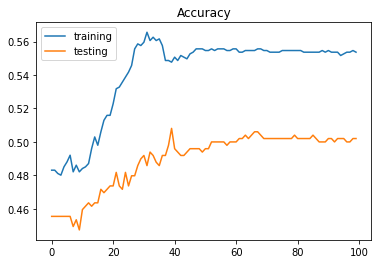


-----------------------------------------------------------------------

Number of Hidden Nodes = 60
Learning rate = 0.1


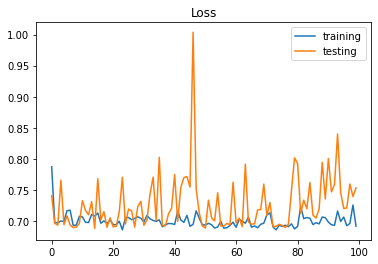

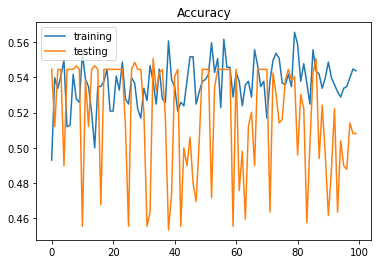


-----------------------------------------------------------------------

Number of Hidden Nodes = 60
Learning rate = 0.01


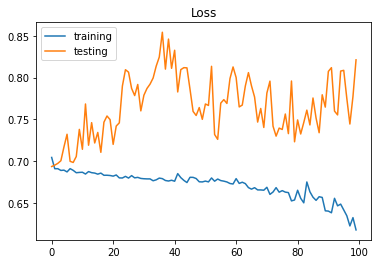

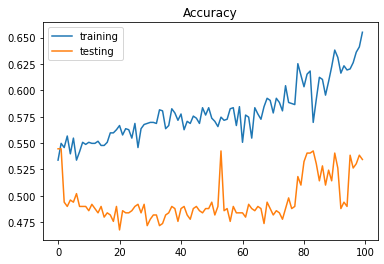


-----------------------------------------------------------------------

Number of Hidden Nodes = 60
Learning rate = 0.001


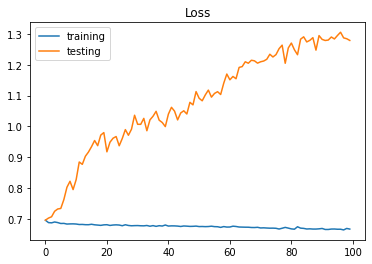

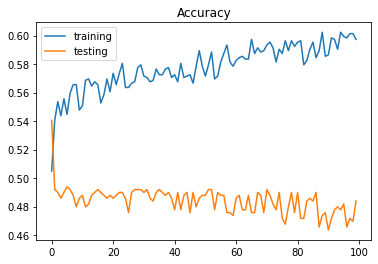


-----------------------------------------------------------------------

Number of Hidden Nodes = 60
Learning rate = 0.0001


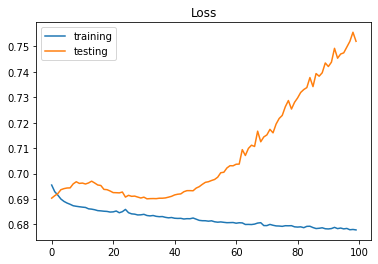

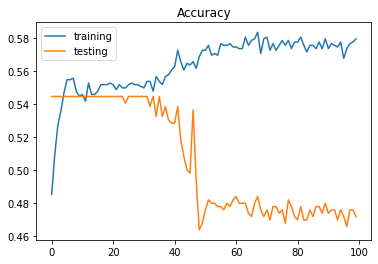


-----------------------------------------------------------------------

Number of Hidden Nodes = 60
Learning rate = 1e-05


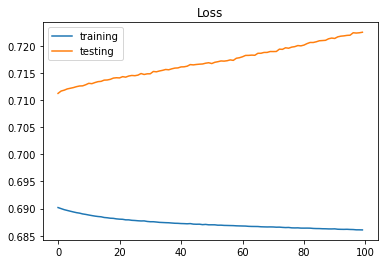

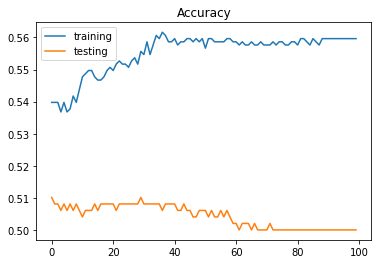


-----------------------------------------------------------------------

Number of Hidden Nodes = 65
Learning rate = 0.1


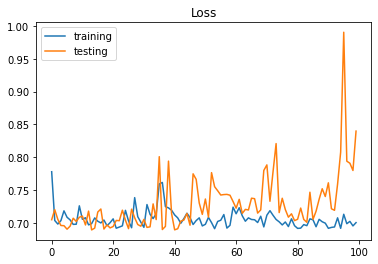

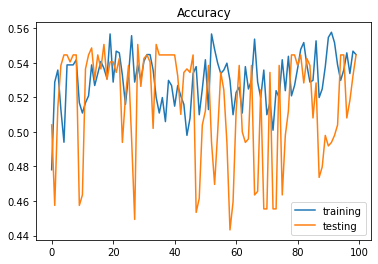


-----------------------------------------------------------------------

Number of Hidden Nodes = 65
Learning rate = 0.01


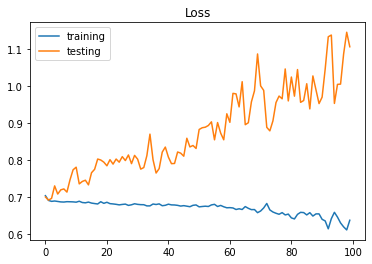

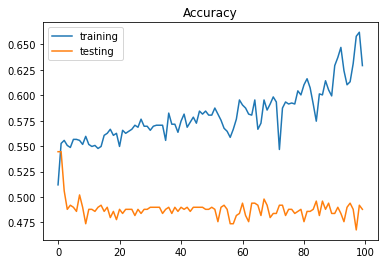


-----------------------------------------------------------------------

Number of Hidden Nodes = 65
Learning rate = 0.001


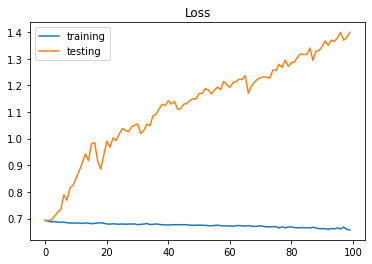

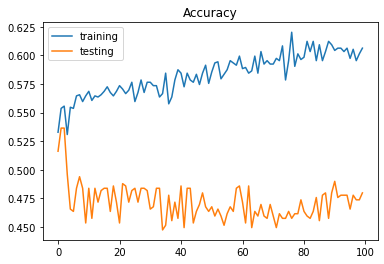


-----------------------------------------------------------------------

Number of Hidden Nodes = 65
Learning rate = 0.0001


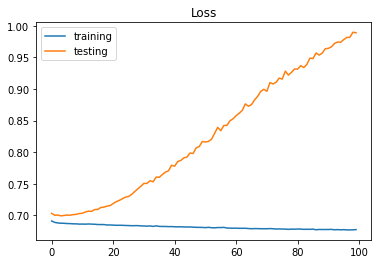

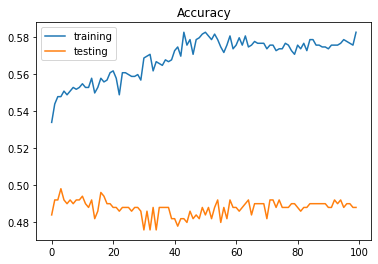


-----------------------------------------------------------------------

Number of Hidden Nodes = 65
Learning rate = 1e-05


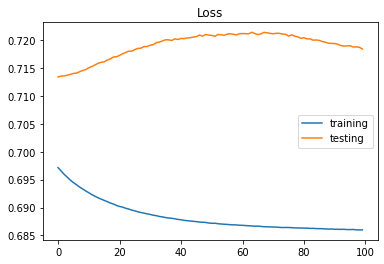

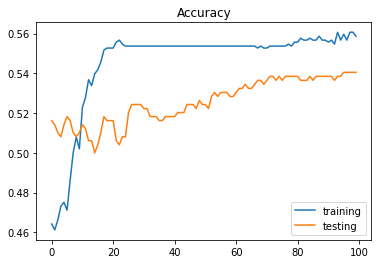


-----------------------------------------------------------------------

Number of Hidden Nodes = 70
Learning rate = 0.1


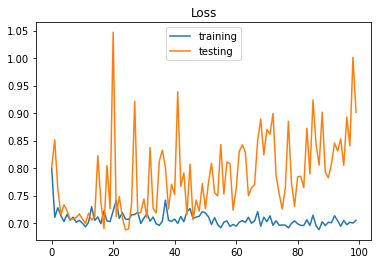

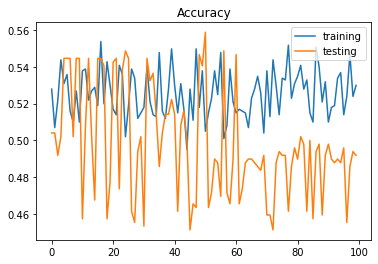


-----------------------------------------------------------------------

Number of Hidden Nodes = 70
Learning rate = 0.01


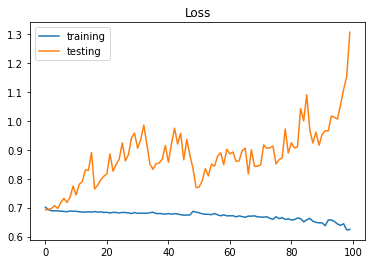

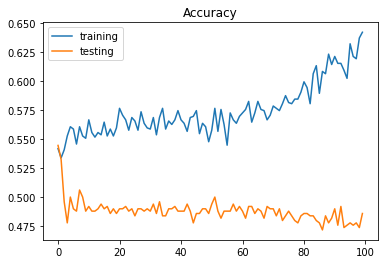


-----------------------------------------------------------------------

Number of Hidden Nodes = 70
Learning rate = 0.001


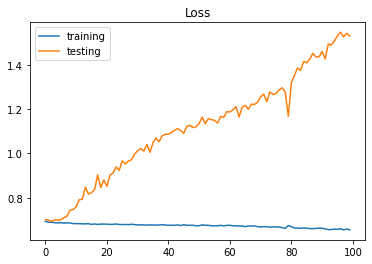

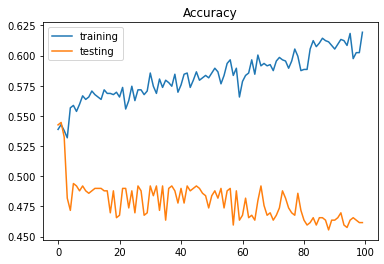


-----------------------------------------------------------------------

Number of Hidden Nodes = 70
Learning rate = 0.0001


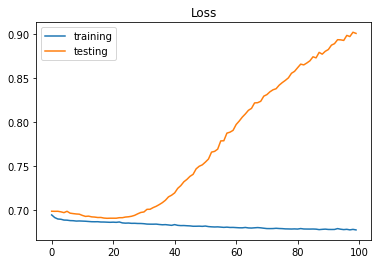

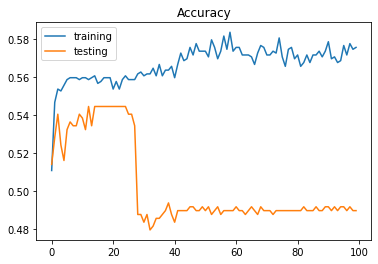


-----------------------------------------------------------------------

Number of Hidden Nodes = 70
Learning rate = 1e-05


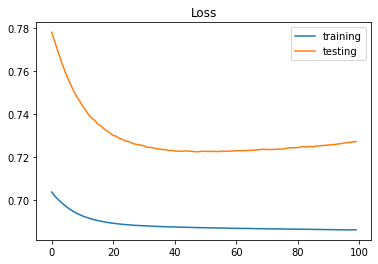

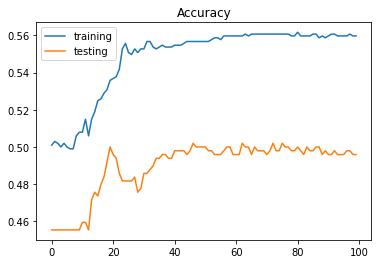


-----------------------------------------------------------------------

Number of Hidden Nodes = 75
Learning rate = 0.1


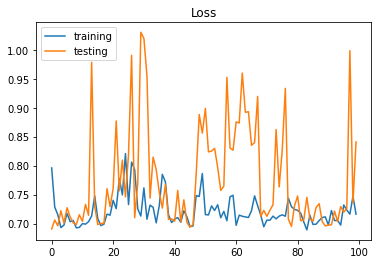

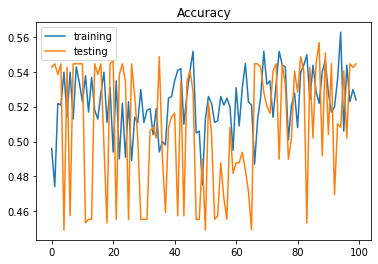


-----------------------------------------------------------------------

Number of Hidden Nodes = 75
Learning rate = 0.01


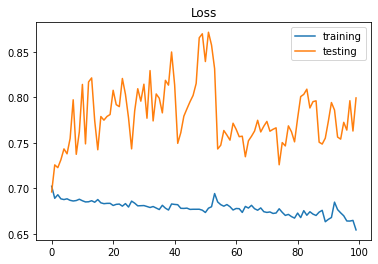

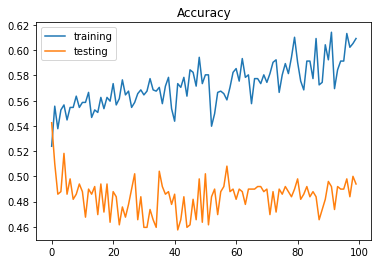


-----------------------------------------------------------------------

Number of Hidden Nodes = 75
Learning rate = 0.001


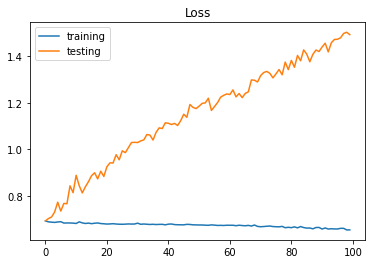

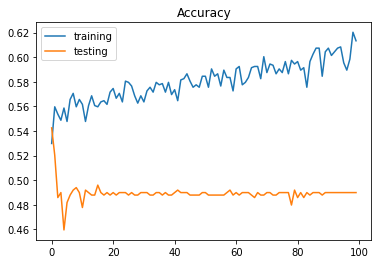


-----------------------------------------------------------------------

Number of Hidden Nodes = 75
Learning rate = 0.0001


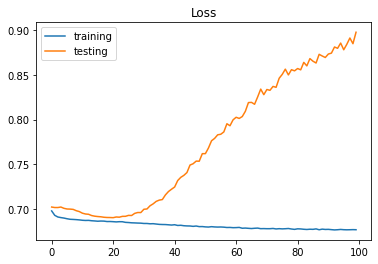

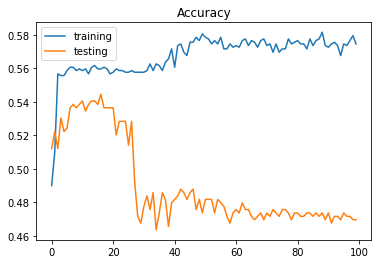


-----------------------------------------------------------------------

Number of Hidden Nodes = 75
Learning rate = 1e-05


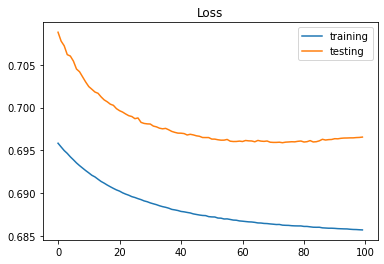

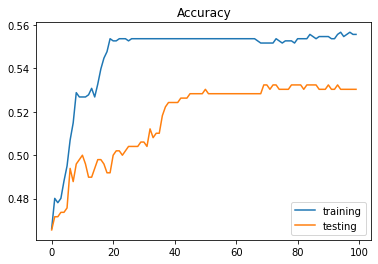


-----------------------------------------------------------------------

Number of Hidden Nodes = 80
Learning rate = 0.1


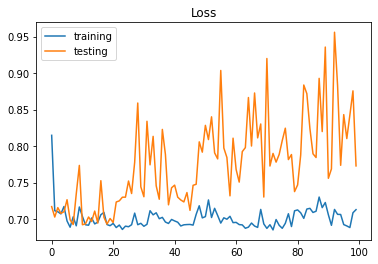

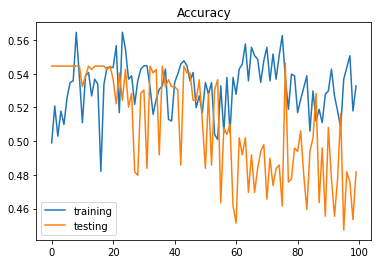


-----------------------------------------------------------------------

Number of Hidden Nodes = 80
Learning rate = 0.01


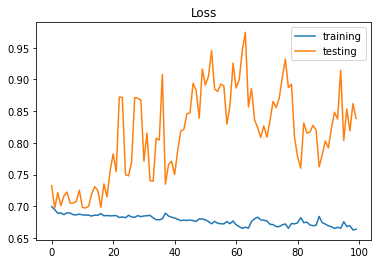

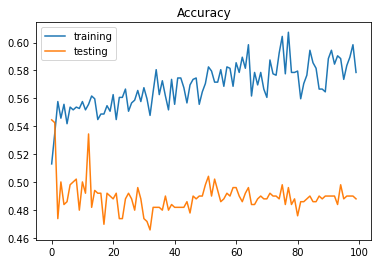


-----------------------------------------------------------------------

Number of Hidden Nodes = 80
Learning rate = 0.001


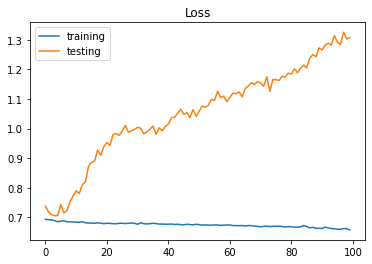

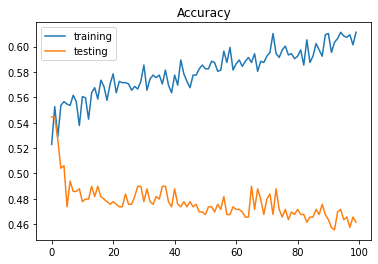


-----------------------------------------------------------------------

Number of Hidden Nodes = 80
Learning rate = 0.0001


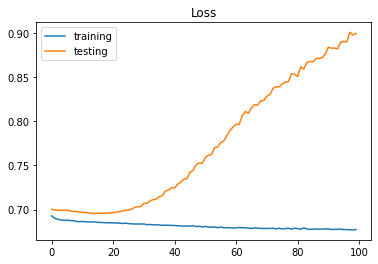

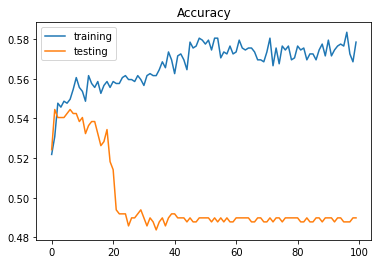


-----------------------------------------------------------------------

Number of Hidden Nodes = 80
Learning rate = 1e-05


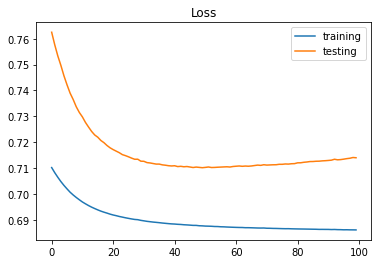

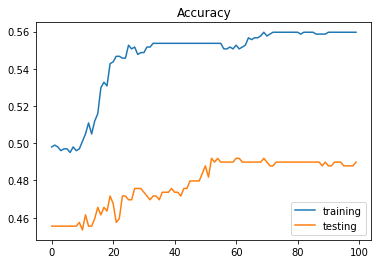


-----------------------------------------------------------------------

Number of Hidden Nodes = 85
Learning rate = 0.1


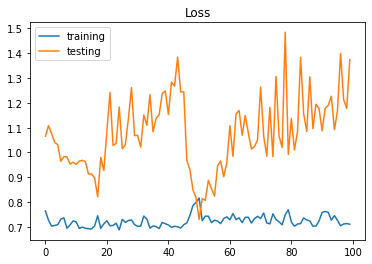

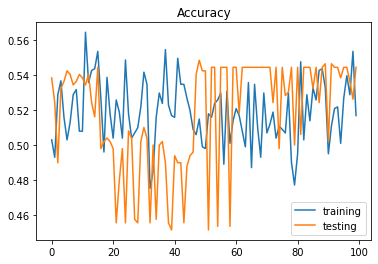


-----------------------------------------------------------------------

Number of Hidden Nodes = 85
Learning rate = 0.01


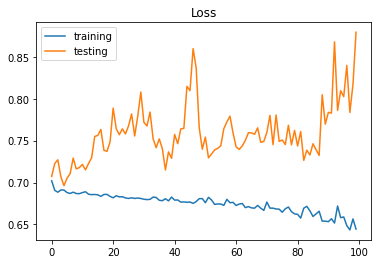

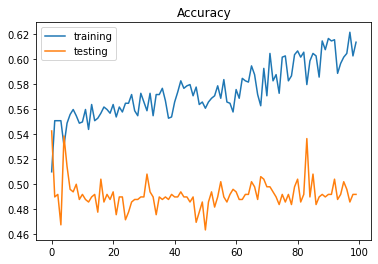


-----------------------------------------------------------------------

Number of Hidden Nodes = 85
Learning rate = 0.001


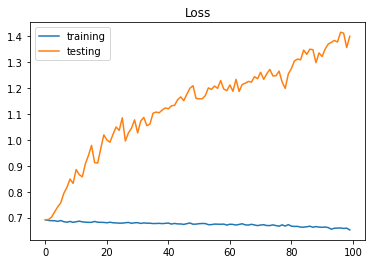

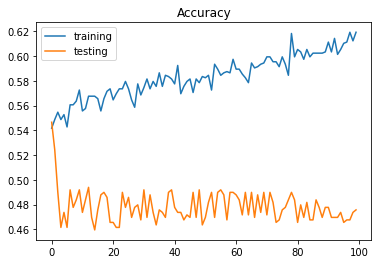


-----------------------------------------------------------------------

Number of Hidden Nodes = 85
Learning rate = 0.0001


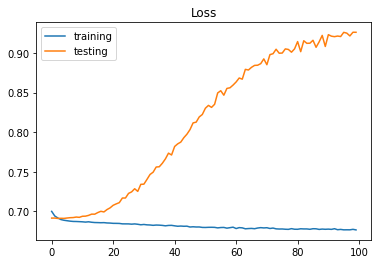

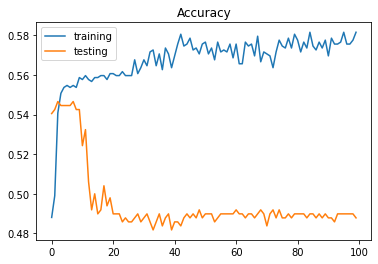


-----------------------------------------------------------------------

Number of Hidden Nodes = 85
Learning rate = 1e-05


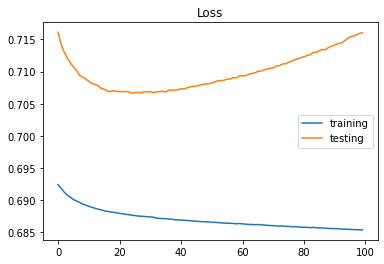

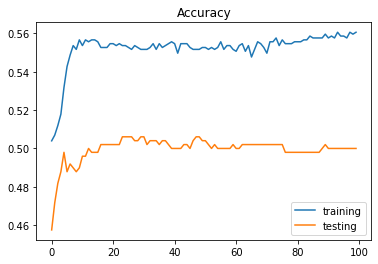


-----------------------------------------------------------------------

Number of Hidden Nodes = 90
Learning rate = 0.1


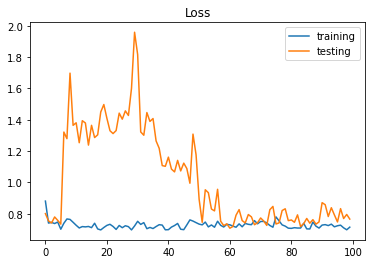

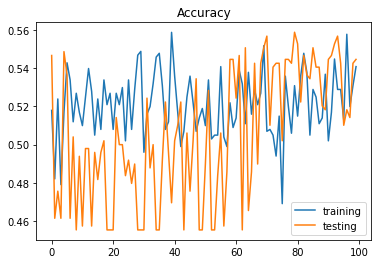


-----------------------------------------------------------------------

Number of Hidden Nodes = 90
Learning rate = 0.01


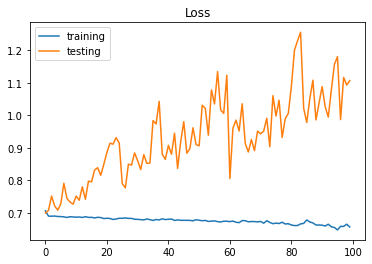

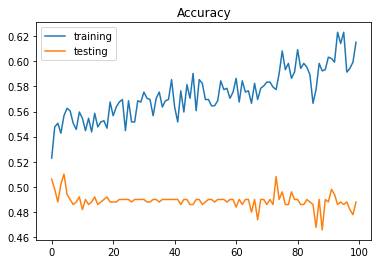


-----------------------------------------------------------------------

Number of Hidden Nodes = 90
Learning rate = 0.001


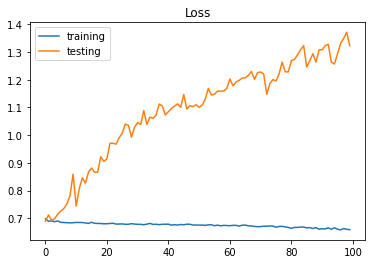

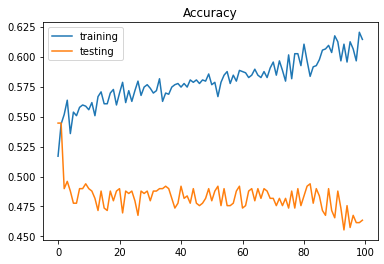


-----------------------------------------------------------------------

Number of Hidden Nodes = 90
Learning rate = 0.0001


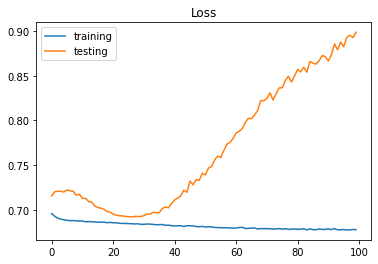

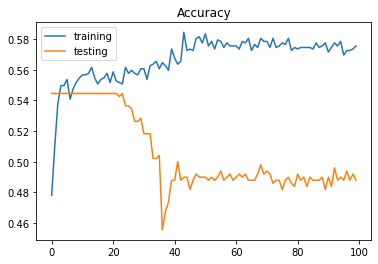


-----------------------------------------------------------------------

Number of Hidden Nodes = 90
Learning rate = 1e-05


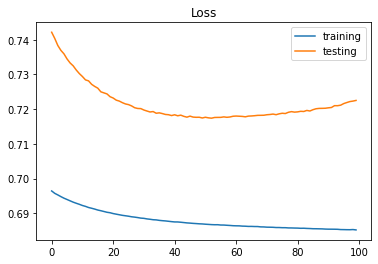

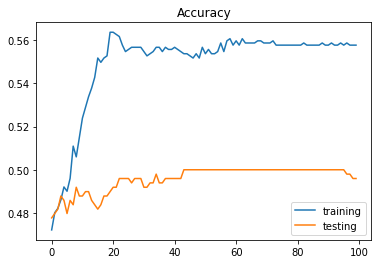


-----------------------------------------------------------------------

Number of Hidden Nodes = 95
Learning rate = 0.1


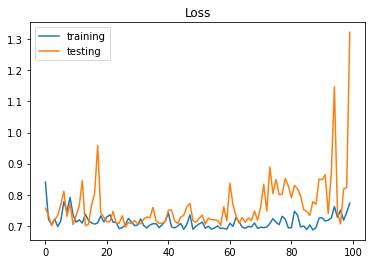

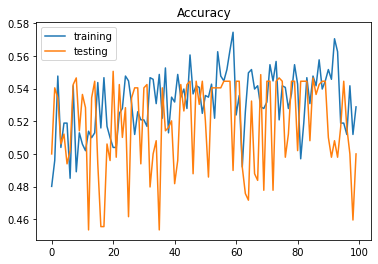


-----------------------------------------------------------------------

Number of Hidden Nodes = 95
Learning rate = 0.01


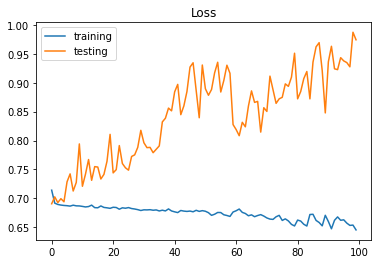

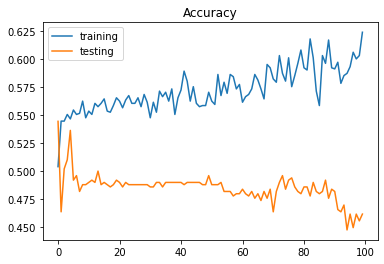


-----------------------------------------------------------------------

Number of Hidden Nodes = 95
Learning rate = 0.001


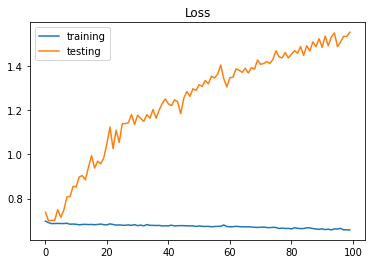

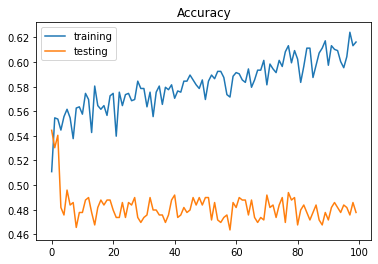


-----------------------------------------------------------------------

Number of Hidden Nodes = 95
Learning rate = 0.0001


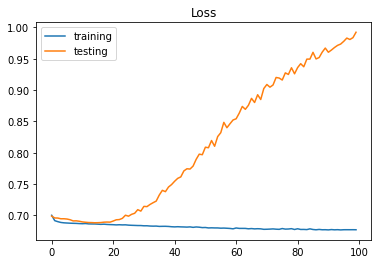

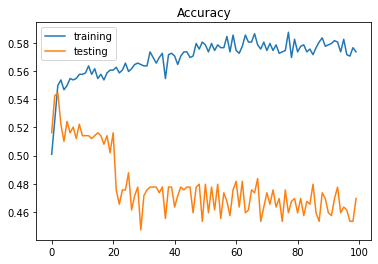


-----------------------------------------------------------------------

Number of Hidden Nodes = 95
Learning rate = 1e-05


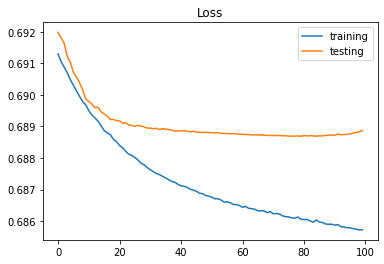

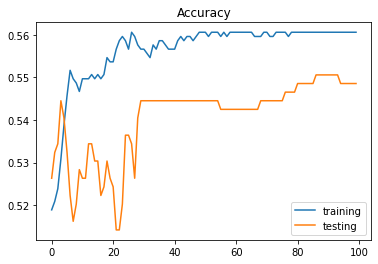


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 0.1


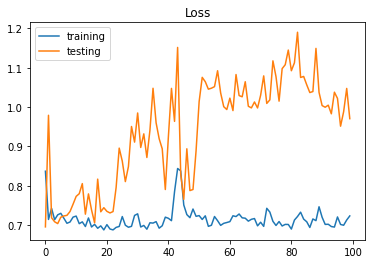

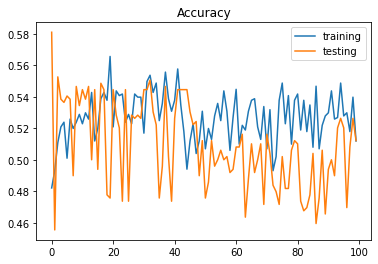


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 0.01


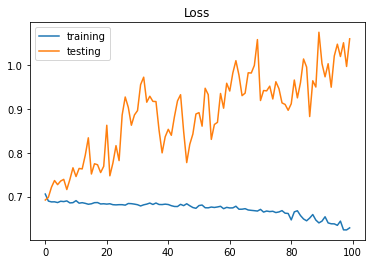

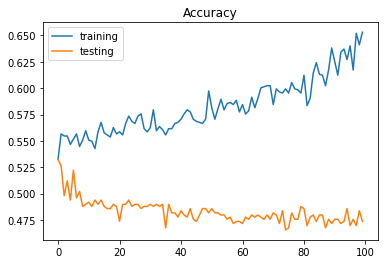


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 0.001


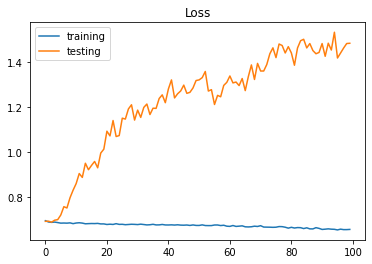

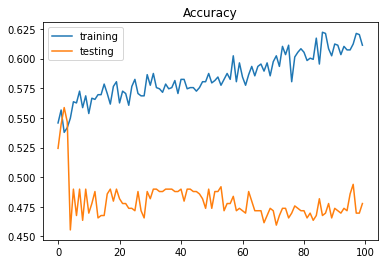


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 0.0001


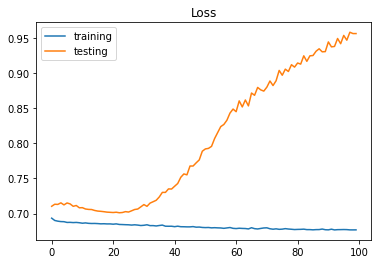

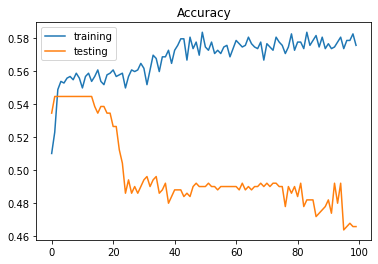


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-05


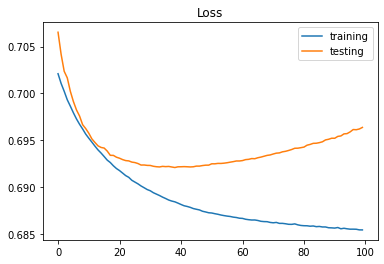

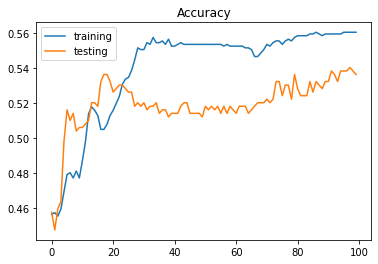


-----------------------------------------------------------------------



In [120]:
for c in range(len(results)):
    print("Number of Hidden Nodes = " + str(results[c][1]) + "\nLearning rate = " + str(results[c][2]))
    plt.title("Loss", loc='center')
    plt.plot(results[c][0].history['loss'], label='training')
    plt.plot(results[c][0].history['val_loss'], label='testing')
    plt.legend()
    plt.show()
    
    plt.title("Accuracy", loc='center')
    plt.plot(results[c][0].history['accuracy'], label='training')
    plt.plot(results[c][0].history['val_accuracy'], label='testing')
    plt.legend()
    plt.show()
    
    print("\n-----------------------------------------------------------------------\n")

First testing result seems to show that lr of 1e -05 is the best
25 1e-5
40 1e -05
50 1e -05
55 1e -05
70 1e -05
75 1e -05
80 1e-5
95 1e -05
100 1e -05

Number of Hidden Nodes = 25
Learning rate = 1e-05


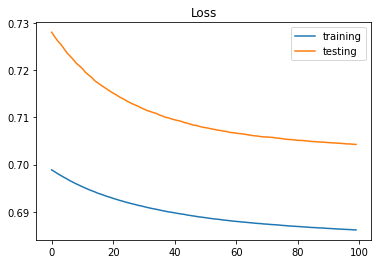

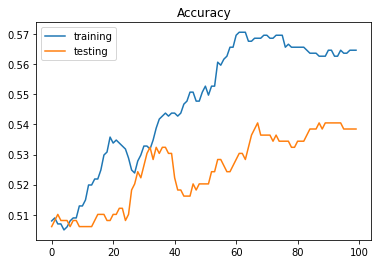


-----------------------------------------------------------------------

Number of Hidden Nodes = 40
Learning rate = 1e-05


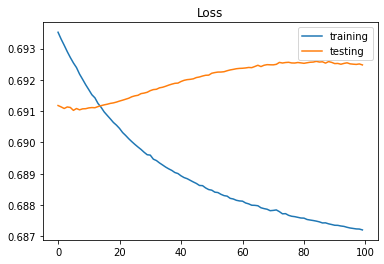

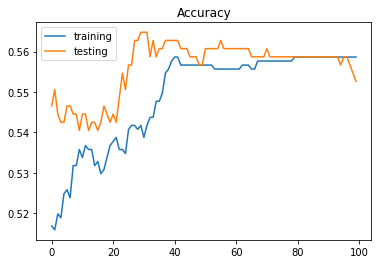


-----------------------------------------------------------------------

Number of Hidden Nodes = 50
Learning rate = 1e-05


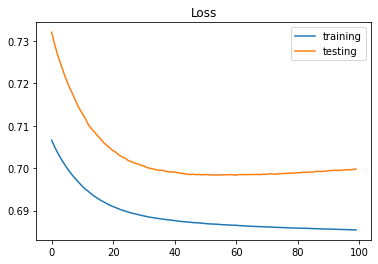

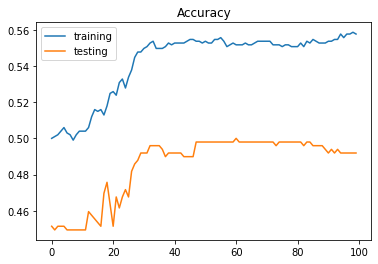


-----------------------------------------------------------------------

Number of Hidden Nodes = 55
Learning rate = 1e-05


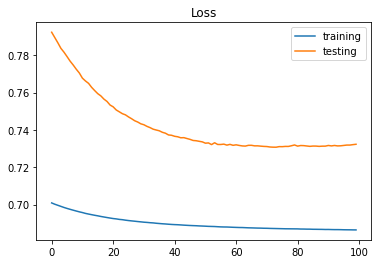

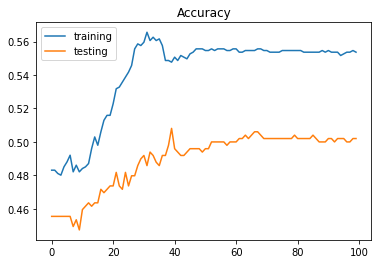


-----------------------------------------------------------------------

Number of Hidden Nodes = 70
Learning rate = 1e-05


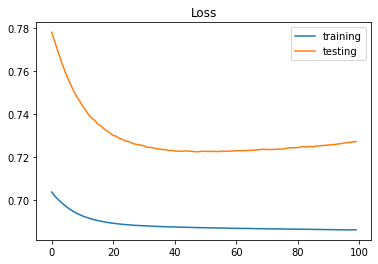

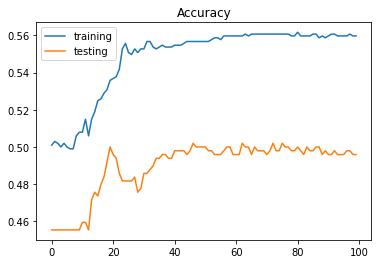


-----------------------------------------------------------------------

Number of Hidden Nodes = 75
Learning rate = 1e-05


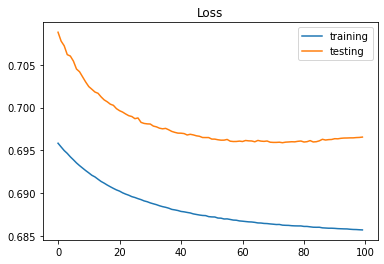

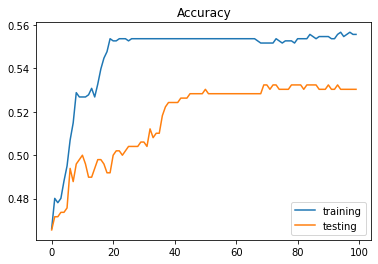


-----------------------------------------------------------------------

Number of Hidden Nodes = 80
Learning rate = 1e-05


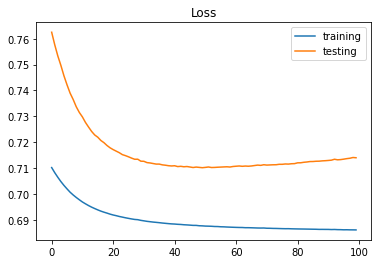

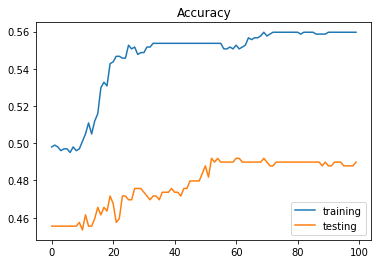


-----------------------------------------------------------------------

Number of Hidden Nodes = 95
Learning rate = 1e-05


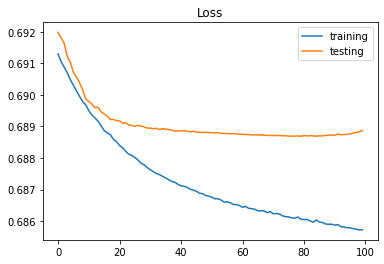

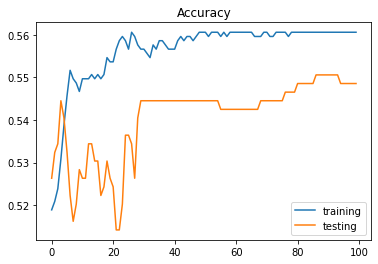


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-05


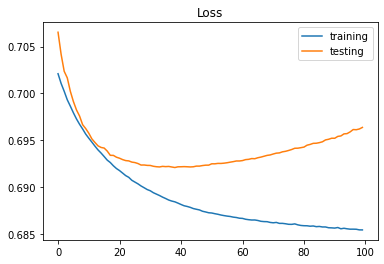

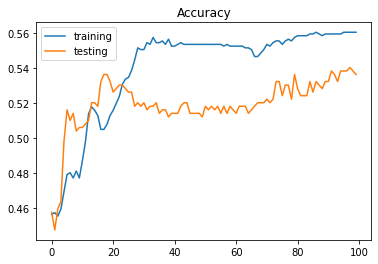


-----------------------------------------------------------------------



In [122]:
hidden = [25, 40, 50, 55, 70, 75, 80, 95, 100]
for c in range(len(results)):
    if(results[c][2] == 1e-5 and results[c][1] in hidden):
        print("Number of Hidden Nodes = " + str(results[c][1]) + "\nLearning rate = " + str(results[c][2]))
        plt.title("Loss", loc='center')
        plt.plot(results[c][0].history['loss'], label='training')
        plt.plot(results[c][0].history['val_loss'], label='testing')
        plt.legend()
        plt.show()
    
        plt.title("Accuracy", loc='center')
        plt.plot(results[c][0].history['accuracy'], label='training')
        plt.plot(results[c][0].history['val_accuracy'], label='testing')
        plt.legend()
        plt.show()
    
        print("\n-----------------------------------------------------------------------\n")

In [123]:
learning_rates = [1e-5, 1e-6, 1e-7]
hidden = 40
epochs = [100, 150, 200, 250, 300]

i = Input(shape=(T,D))
results2 = {}
c = 0

for e in epochs:
    for l in learning_rates:
        x = LSTM(hidden)(i) 
        x = Dense(1, activation='sigmoid')(x)
        model = Model(i, x)
        model.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=l), #hyper parameter
            metrics=['accuracy']
        )
        r = model.fit(
            X_train, 
            y_train,
            epochs = e, 
            batch_size = 32,
            validation_data = (X_test, y_test)
        )
        results2[c] = [r, hdn, l]
        c += 1

Epoch 1/100
32/32 [==============================] - 2s 16ms/step - loss: 0.6971 - accuracy: 0.4853 - val_loss: 0.7211 - val_accuracy: 0.4676
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5124 - val_loss: 0.7207 - val_accuracy: 0.4676
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5039 - val_loss: 0.7202 - val_accuracy: 0.4676
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5086 - val_loss: 0.7196 - val_accuracy: 0.4737
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5288 - val_loss: 0.7193 - val_accuracy: 0.4717
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5276 - val_loss: 0.7188 - val_accuracy: 0.4717
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5193 - val_loss: 0.7185 - val_accuracy: 0.4757
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6866 - accuracy: 0.5538 - val_loss: 0.7074 - val_accuracy: 0.4960
Epoch 60/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.5411 - val_loss: 0.7074 - val_accuracy: 0.4960
Epoch 61/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6879 - accuracy: 0.5630 - val_loss: 0.7073 - val_accuracy: 0.4960
Epoch 62/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5221 - val_loss: 0.7072 - val_accuracy: 0.4939
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.5679 - val_loss: 0.7072 - val_accuracy: 0.4939
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5615 - val_loss: 0.7071 - val_accuracy: 0.4960
Epoch 65/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5363 - val_loss: 0.7071 - val_accuracy: 0.4960
Epoch 

Epoch 17/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5161 - val_loss: 0.6885 - val_accuracy: 0.5405
Epoch 18/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6989 - accuracy: 0.4907 - val_loss: 0.6885 - val_accuracy: 0.5405
Epoch 19/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5136 - val_loss: 0.6885 - val_accuracy: 0.5405
Epoch 20/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.5061 - val_loss: 0.6885 - val_accuracy: 0.5405
Epoch 21/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.5123 - val_loss: 0.6885 - val_accuracy: 0.5405
Epoch 22/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5070 - val_loss: 0.6885 - val_accuracy: 0.5405
Epoch 23/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.5031 - val_loss: 0.6885 - val_accuracy: 0.5405
Epoch 

Epoch 75/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5299 - val_loss: 0.6883 - val_accuracy: 0.5405
Epoch 76/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5134 - val_loss: 0.6883 - val_accuracy: 0.5405
Epoch 77/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.5001 - val_loss: 0.6883 - val_accuracy: 0.5425
Epoch 78/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.5018 - val_loss: 0.6883 - val_accuracy: 0.5425
Epoch 79/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.4968 - val_loss: 0.6883 - val_accuracy: 0.5425
Epoch 80/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.4918 - val_loss: 0.6883 - val_accuracy: 0.5425
Epoch 81/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.4922 - val_loss: 0.6883 - val_accuracy: 0.5425
Epoch 

Epoch 33/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.5143 - val_loss: 0.7457 - val_accuracy: 0.4899
Epoch 34/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.5038 - val_loss: 0.7457 - val_accuracy: 0.4899
Epoch 35/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.5073 - val_loss: 0.7457 - val_accuracy: 0.4899
Epoch 36/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.5015 - val_loss: 0.7457 - val_accuracy: 0.4899
Epoch 37/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5058 - val_loss: 0.7457 - val_accuracy: 0.4899
Epoch 38/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6988 - accuracy: 0.4959 - val_loss: 0.7457 - val_accuracy: 0.4899
Epoch 39/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7045 - accuracy: 0.4898 - val_loss: 0.7457 - val_accuracy: 0.4899
Epoch 

Epoch 91/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.4748 - val_loss: 0.7450 - val_accuracy: 0.4899
Epoch 92/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7003 - accuracy: 0.5061 - val_loss: 0.7450 - val_accuracy: 0.4899
Epoch 93/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6998 - accuracy: 0.4902 - val_loss: 0.7450 - val_accuracy: 0.4919
Epoch 94/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5119 - val_loss: 0.7450 - val_accuracy: 0.4919
Epoch 95/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5218 - val_loss: 0.7449 - val_accuracy: 0.4919
Epoch 96/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5328 - val_loss: 0.7449 - val_accuracy: 0.4919
Epoch 97/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.5045 - val_loss: 0.7449 - val_accuracy: 0.4919
Epoch 

Epoch 49/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5398 - val_loss: 0.6899 - val_accuracy: 0.5344
Epoch 50/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5421 - val_loss: 0.6899 - val_accuracy: 0.5344
Epoch 51/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.5879 - val_loss: 0.6899 - val_accuracy: 0.5344
Epoch 52/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5393 - val_loss: 0.6899 - val_accuracy: 0.5344
Epoch 53/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.5884 - val_loss: 0.6899 - val_accuracy: 0.5344
Epoch 54/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5524 - val_loss: 0.6898 - val_accuracy: 0.5344
Epoch 55/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5264 - val_loss: 0.6898 - val_accuracy: 0.5344
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.6997 - accuracy: 0.5007 - val_loss: 0.7016 - val_accuracy: 0.5101
Epoch 14/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5247 - val_loss: 0.7016 - val_accuracy: 0.5101
Epoch 15/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5118 - val_loss: 0.7015 - val_accuracy: 0.5101
Epoch 16/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5145 - val_loss: 0.7015 - val_accuracy: 0.5121
Epoch 17/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.5139 - val_loss: 0.7015 - val_accuracy: 0.5121
Epoch 18/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5274 - val_loss: 0.7014 - val_accuracy: 0.5121
Epoch 19/150
32/32 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.5092 - val_loss: 0.7014 - val_accuracy: 0.5121
Epoch 20/150
32/32 

Epoch 71/150
32/32 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.5340 - val_loss: 0.7000 - val_accuracy: 0.5101
Epoch 72/150
32/32 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.5181 - val_loss: 0.7000 - val_accuracy: 0.5101
Epoch 73/150
32/32 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.5163 - val_loss: 0.6999 - val_accuracy: 0.5101
Epoch 74/150
32/32 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.5424 - val_loss: 0.6999 - val_accuracy: 0.5101
Epoch 75/150
32/32 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.5091 - val_loss: 0.6999 - val_accuracy: 0.5101
Epoch 76/150
32/32 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5299 - val_loss: 0.6999 - val_accuracy: 0.5101
Epoch 77/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5338 - val_loss: 0.6999 - val_accuracy: 0.5101
Epoch 

Epoch 36/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7050 - accuracy: 0.4673 - val_loss: 0.7234 - val_accuracy: 0.4555
Epoch 37/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7064 - accuracy: 0.4571 - val_loss: 0.7234 - val_accuracy: 0.4555
Epoch 38/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7111 - accuracy: 0.4590 - val_loss: 0.7234 - val_accuracy: 0.4555
Epoch 39/150
32/32 [==============================] - 0s 5ms/step - loss: 0.7081 - accuracy: 0.4579 - val_loss: 0.7234 - val_accuracy: 0.4555
Epoch 40/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7079 - accuracy: 0.4558 - val_loss: 0.7233 - val_accuracy: 0.4555
Epoch 41/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7096 - accuracy: 0.4633 - val_loss: 0.7233 - val_accuracy: 0.4555
Epoch 42/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7058 - accuracy: 0.4708 - val_loss: 0.7233 - val_accuracy: 0.4555
Epoch 

Epoch 94/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7049 - accuracy: 0.4966 - val_loss: 0.7228 - val_accuracy: 0.4555
Epoch 95/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7084 - accuracy: 0.4716 - val_loss: 0.7228 - val_accuracy: 0.4555
Epoch 96/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7088 - accuracy: 0.4592 - val_loss: 0.7228 - val_accuracy: 0.4555
Epoch 97/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7078 - accuracy: 0.4570 - val_loss: 0.7228 - val_accuracy: 0.4555
Epoch 98/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7106 - accuracy: 0.4596 - val_loss: 0.7228 - val_accuracy: 0.4555
Epoch 99/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7081 - accuracy: 0.4555 - val_loss: 0.7228 - val_accuracy: 0.4555
Epoch 100/150
32/32 [==============================] - 0s 4ms/step - loss: 0.7020 - accuracy: 0.4765 - val_loss: 0.7227 - val_accuracy: 0.4555
Epoch

Epoch 59/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6905 - accuracy: 0.5390 - val_loss: 0.7372 - val_accuracy: 0.4960
Epoch 60/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6869 - accuracy: 0.5441 - val_loss: 0.7370 - val_accuracy: 0.4960
Epoch 61/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5188 - val_loss: 0.7369 - val_accuracy: 0.4939
Epoch 62/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6891 - accuracy: 0.5517 - val_loss: 0.7366 - val_accuracy: 0.4939
Epoch 63/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6850 - accuracy: 0.5545 - val_loss: 0.7365 - val_accuracy: 0.4939
Epoch 64/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6885 - accuracy: 0.5452 - val_loss: 0.7363 - val_accuracy: 0.4939
Epoch 65/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6844 - accuracy: 0.5705 - val_loss: 0.7362 - val_accuracy: 0.4939
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.6840 - accuracy: 0.5722 - val_loss: 0.7313 - val_accuracy: 0.4980
Epoch 174/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5396 - val_loss: 0.7313 - val_accuracy: 0.4980
Epoch 175/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.5631 - val_loss: 0.7314 - val_accuracy: 0.4980
Epoch 176/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6840 - accuracy: 0.5604 - val_loss: 0.7314 - val_accuracy: 0.4980
Epoch 177/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.5587 - val_loss: 0.7314 - val_accuracy: 0.4980
Epoch 178/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5480 - val_loss: 0.7314 - val_accuracy: 0.4980
Epoch 179/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5360 - val_loss: 0.7315 - val_accuracy: 0.4980
Epoch 180/200

Epoch 88/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5635 - val_loss: 0.6962 - val_accuracy: 0.5445
Epoch 89/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5320 - val_loss: 0.6962 - val_accuracy: 0.5445
Epoch 90/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6992 - accuracy: 0.5353 - val_loss: 0.6962 - val_accuracy: 0.5445
Epoch 91/200
32/32 [==============================] - 0s 5ms/step - loss: 0.7037 - accuracy: 0.5174 - val_loss: 0.6962 - val_accuracy: 0.5445
Epoch 92/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6976 - accuracy: 0.5277 - val_loss: 0.6962 - val_accuracy: 0.5445
Epoch 93/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6960 - accuracy: 0.5228 - val_loss: 0.6962 - val_accuracy: 0.5445
Epoch 94/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6956 - accuracy: 0.5375 - val_loss: 0.6962 - val_accuracy: 0.5445
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.7025 - accuracy: 0.4832 - val_loss: 0.7169 - val_accuracy: 0.4777
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7000 - accuracy: 0.5033 - val_loss: 0.7169 - val_accuracy: 0.4777
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5120 - val_loss: 0.7169 - val_accuracy: 0.4777
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.5247 - val_loss: 0.7169 - val_accuracy: 0.4777
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 0.7033 - accuracy: 0.4993 - val_loss: 0.7169 - val_accuracy: 0.4777
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7041 - accuracy: 0.5016 - val_loss: 0.7169 - val_accuracy: 0.4777
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7010 - accuracy: 0.5189 - val_loss: 0.7168 - val_accuracy: 0.4777
Epoch 9/200
32/32 [======

Epoch 60/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.4957 - val_loss: 0.7161 - val_accuracy: 0.4798
Epoch 61/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7043 - accuracy: 0.4916 - val_loss: 0.7161 - val_accuracy: 0.4798
Epoch 62/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.5265 - val_loss: 0.7161 - val_accuracy: 0.4798
Epoch 63/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5291 - val_loss: 0.7160 - val_accuracy: 0.4798
Epoch 64/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7010 - accuracy: 0.5025 - val_loss: 0.7160 - val_accuracy: 0.4798
Epoch 65/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.5150 - val_loss: 0.7160 - val_accuracy: 0.4798
Epoch 66/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6995 - accuracy: 0.5096 - val_loss: 0.7160 - val_accuracy: 0.4798
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5176 - val_loss: 0.7145 - val_accuracy: 0.4838
Epoch 175/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6997 - accuracy: 0.5217 - val_loss: 0.7145 - val_accuracy: 0.4838
Epoch 176/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6999 - accuracy: 0.4968 - val_loss: 0.7145 - val_accuracy: 0.4838
Epoch 177/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.4921 - val_loss: 0.7145 - val_accuracy: 0.4838
Epoch 178/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7031 - accuracy: 0.4922 - val_loss: 0.7144 - val_accuracy: 0.4838
Epoch 179/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5248 - val_loss: 0.7144 - val_accuracy: 0.4838
Epoch 180/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.4778 - val_loss: 0.7144 - val_accuracy: 0.4838
Epoch 181/200

Epoch 89/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.5657 - val_loss: 0.7408 - val_accuracy: 0.4919
Epoch 90/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5467 - val_loss: 0.7408 - val_accuracy: 0.4919
Epoch 91/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.5502 - val_loss: 0.7409 - val_accuracy: 0.4919
Epoch 92/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5518 - val_loss: 0.7410 - val_accuracy: 0.4919
Epoch 93/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5535 - val_loss: 0.7410 - val_accuracy: 0.4939
Epoch 94/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.5610 - val_loss: 0.7412 - val_accuracy: 0.4919
Epoch 95/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5424 - val_loss: 0.7412 - val_accuracy: 0.4919
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5477 - val_loss: 0.7549 - val_accuracy: 0.4899
Epoch 204/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5499 - val_loss: 0.7550 - val_accuracy: 0.4899
Epoch 205/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.5723 - val_loss: 0.7551 - val_accuracy: 0.4899
Epoch 206/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5695 - val_loss: 0.7553 - val_accuracy: 0.4899
Epoch 207/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5571 - val_loss: 0.7553 - val_accuracy: 0.4899
Epoch 208/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5492 - val_loss: 0.7557 - val_accuracy: 0.4879
Epoch 209/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5646 - val_loss: 0.7559 - val_accuracy: 0.4879
Epoch 210/250

Epoch 68/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5433 - val_loss: 0.6919 - val_accuracy: 0.5304
Epoch 69/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5457 - val_loss: 0.6919 - val_accuracy: 0.5304
Epoch 70/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5344 - val_loss: 0.6919 - val_accuracy: 0.5304
Epoch 71/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5222 - val_loss: 0.6919 - val_accuracy: 0.5304
Epoch 72/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5075 - val_loss: 0.6919 - val_accuracy: 0.5304
Epoch 73/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5160 - val_loss: 0.6919 - val_accuracy: 0.5324
Epoch 74/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5399 - val_loss: 0.6918 - val_accuracy: 0.5324
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5181 - val_loss: 0.6909 - val_accuracy: 0.5364
Epoch 183/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5220 - val_loss: 0.6909 - val_accuracy: 0.5364
Epoch 184/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5378 - val_loss: 0.6909 - val_accuracy: 0.5364
Epoch 185/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5319 - val_loss: 0.6909 - val_accuracy: 0.5364
Epoch 186/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5251 - val_loss: 0.6909 - val_accuracy: 0.5364
Epoch 187/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5232 - val_loss: 0.6909 - val_accuracy: 0.5364
Epoch 188/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5115 - val_loss: 0.6909 - val_accuracy: 0.5364
Epoch 189/250

Epoch 47/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5262 - val_loss: 0.6969 - val_accuracy: 0.5202
Epoch 48/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5438 - val_loss: 0.6969 - val_accuracy: 0.5202
Epoch 49/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5216 - val_loss: 0.6969 - val_accuracy: 0.5202
Epoch 50/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5065 - val_loss: 0.6969 - val_accuracy: 0.5202
Epoch 51/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5498 - val_loss: 0.6969 - val_accuracy: 0.5202
Epoch 52/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5331 - val_loss: 0.6969 - val_accuracy: 0.5202
Epoch 53/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5258 - val_loss: 0.6969 - val_accuracy: 0.5202
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5201 - val_loss: 0.6968 - val_accuracy: 0.5202
Epoch 162/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5498 - val_loss: 0.6968 - val_accuracy: 0.5202
Epoch 163/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.4966 - val_loss: 0.6968 - val_accuracy: 0.5202
Epoch 164/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.5204 - val_loss: 0.6968 - val_accuracy: 0.5202
Epoch 165/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5202 - val_loss: 0.6968 - val_accuracy: 0.5202
Epoch 166/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5263 - val_loss: 0.6968 - val_accuracy: 0.5202
Epoch 167/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5240 - val_loss: 0.6968 - val_accuracy: 0.5202
Epoch 168/250

32/32 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5405 - val_loss: 0.6972 - val_accuracy: 0.4919
Epoch 26/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5076 - val_loss: 0.6970 - val_accuracy: 0.4919
Epoch 27/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5453 - val_loss: 0.6970 - val_accuracy: 0.4939
Epoch 28/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5343 - val_loss: 0.6967 - val_accuracy: 0.4980
Epoch 29/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5257 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 30/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5300 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 31/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5242 - val_loss: 0.6962 - val_accuracy: 0.5020
Epoch 32/300
32/32 

Epoch 83/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5562 - val_loss: 0.6930 - val_accuracy: 0.5283
Epoch 84/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5453 - val_loss: 0.6930 - val_accuracy: 0.5263
Epoch 85/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5369 - val_loss: 0.6930 - val_accuracy: 0.5283
Epoch 86/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5541 - val_loss: 0.6930 - val_accuracy: 0.5283
Epoch 87/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.5558 - val_loss: 0.6930 - val_accuracy: 0.5283
Epoch 88/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5748 - val_loss: 0.6930 - val_accuracy: 0.5304
Epoch 89/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5534 - val_loss: 0.6930 - val_accuracy: 0.5304
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5609 - val_loss: 0.6948 - val_accuracy: 0.4980
Epoch 198/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5532 - val_loss: 0.6948 - val_accuracy: 0.4980
Epoch 199/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5686 - val_loss: 0.6948 - val_accuracy: 0.4980
Epoch 200/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5432 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 201/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.5722 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 202/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.5917 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 203/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5441 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 204/300

32/32 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5067 - val_loss: 0.7313 - val_accuracy: 0.4494
Epoch 12/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.4909 - val_loss: 0.7311 - val_accuracy: 0.4494
Epoch 13/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7000 - accuracy: 0.4934 - val_loss: 0.7310 - val_accuracy: 0.4494
Epoch 14/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7012 - accuracy: 0.4816 - val_loss: 0.7308 - val_accuracy: 0.4494
Epoch 15/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5043 - val_loss: 0.7307 - val_accuracy: 0.4494
Epoch 16/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.4956 - val_loss: 0.7305 - val_accuracy: 0.4494
Epoch 17/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.5161 - val_loss: 0.7304 - val_accuracy: 0.4494
Epoch 18/300
32/32 

Epoch 69/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.4936 - val_loss: 0.7233 - val_accuracy: 0.4494
Epoch 70/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5109 - val_loss: 0.7232 - val_accuracy: 0.4494
Epoch 71/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.5097 - val_loss: 0.7231 - val_accuracy: 0.4494
Epoch 72/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5099 - val_loss: 0.7230 - val_accuracy: 0.4494
Epoch 73/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.4998 - val_loss: 0.7229 - val_accuracy: 0.4494
Epoch 74/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.4816 - val_loss: 0.7228 - val_accuracy: 0.4494
Epoch 75/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.4826 - val_loss: 0.7227 - val_accuracy: 0.4494
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.4691 - val_loss: 0.7132 - val_accuracy: 0.4555
Epoch 184/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4984 - val_loss: 0.7132 - val_accuracy: 0.4555
Epoch 185/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5235 - val_loss: 0.7131 - val_accuracy: 0.4555
Epoch 186/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.4953 - val_loss: 0.7130 - val_accuracy: 0.4555
Epoch 187/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5253 - val_loss: 0.7130 - val_accuracy: 0.4534
Epoch 188/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4881 - val_loss: 0.7129 - val_accuracy: 0.4534
Epoch 189/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.4783 - val_loss: 0.7128 - val_accuracy: 0.4534
Epoch 190/300

32/32 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5200 - val_loss: 0.7076 - val_accuracy: 0.4291
Epoch 298/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5043 - val_loss: 0.7075 - val_accuracy: 0.4271
Epoch 299/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5543 - val_loss: 0.7075 - val_accuracy: 0.4271
Epoch 300/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5152 - val_loss: 0.7075 - val_accuracy: 0.4231
Epoch 1/300
32/32 [==============================] - 4s 15ms/step - loss: 0.7020 - accuracy: 0.4764 - val_loss: 0.7435 - val_accuracy: 0.4555
Epoch 2/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.5078 - val_loss: 0.7435 - val_accuracy: 0.4555
Epoch 3/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.5006 - val_loss: 0.7435 - val_accuracy: 0.4555
Epoch 4/300
32/32 

Epoch 55/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.4981 - val_loss: 0.7425 - val_accuracy: 0.4555
Epoch 56/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.4933 - val_loss: 0.7424 - val_accuracy: 0.4555
Epoch 57/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5136 - val_loss: 0.7424 - val_accuracy: 0.4555
Epoch 58/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.4914 - val_loss: 0.7424 - val_accuracy: 0.4555
Epoch 59/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.4782 - val_loss: 0.7424 - val_accuracy: 0.4555
Epoch 60/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 0.5058 - val_loss: 0.7424 - val_accuracy: 0.4555
Epoch 61/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.4963 - val_loss: 0.7423 - val_accuracy: 0.4555
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.4923 - val_loss: 0.7403 - val_accuracy: 0.4555
Epoch 170/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5209 - val_loss: 0.7403 - val_accuracy: 0.4555
Epoch 171/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5107 - val_loss: 0.7403 - val_accuracy: 0.4555
Epoch 172/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.5228 - val_loss: 0.7403 - val_accuracy: 0.4555
Epoch 173/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.4885 - val_loss: 0.7402 - val_accuracy: 0.4555
Epoch 174/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.5073 - val_loss: 0.7402 - val_accuracy: 0.4555
Epoch 175/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5003 - val_loss: 0.7402 - val_accuracy: 0.4555
Epoch 176/300

32/32 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.5026 - val_loss: 0.7383 - val_accuracy: 0.4555
Epoch 284/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5221 - val_loss: 0.7383 - val_accuracy: 0.4555
Epoch 285/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5047 - val_loss: 0.7383 - val_accuracy: 0.4555
Epoch 286/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5227 - val_loss: 0.7382 - val_accuracy: 0.4555
Epoch 287/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.5077 - val_loss: 0.7382 - val_accuracy: 0.4555
Epoch 288/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5113 - val_loss: 0.7382 - val_accuracy: 0.4555
Epoch 289/300
32/32 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.4853 - val_loss: 0.7382 - val_accuracy: 0.4555
Epoch 290/300

Number of Hidden Nodes = 100
Learning rate = 1e-05


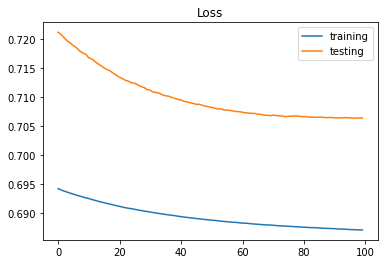

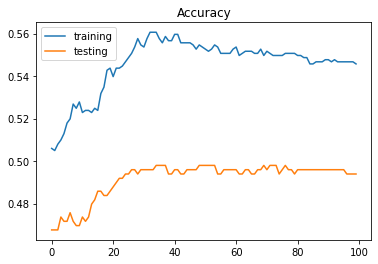


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-06


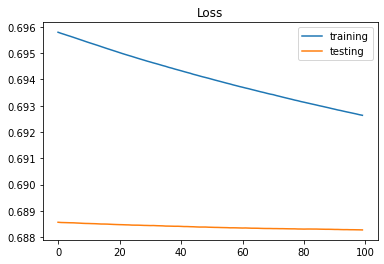

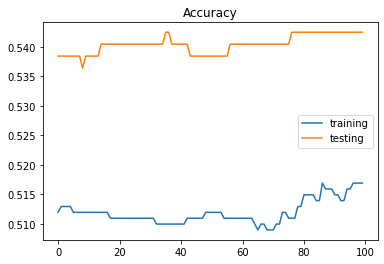


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-07


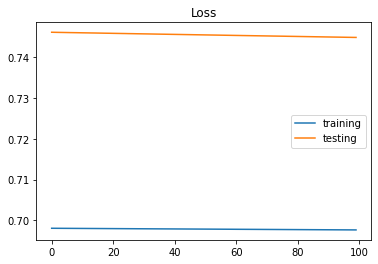

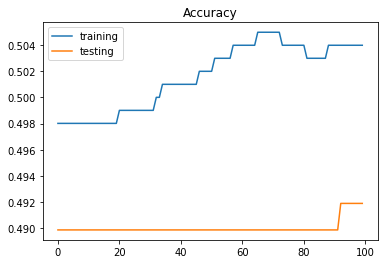


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-05


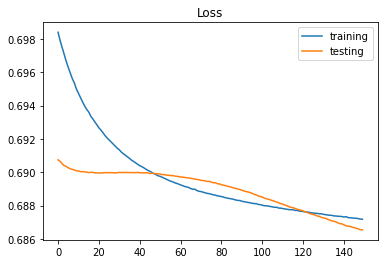

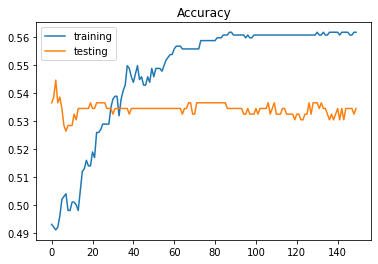


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-06


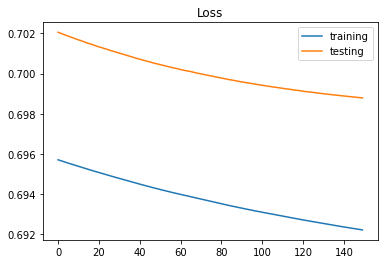

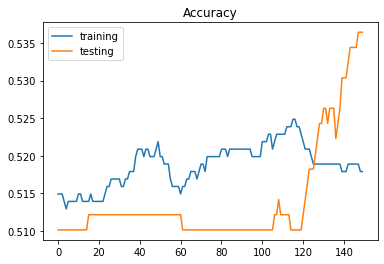


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-07


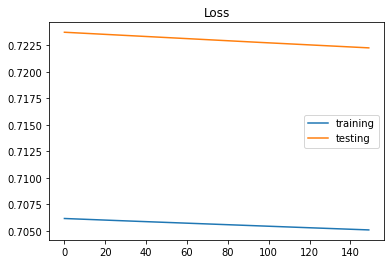

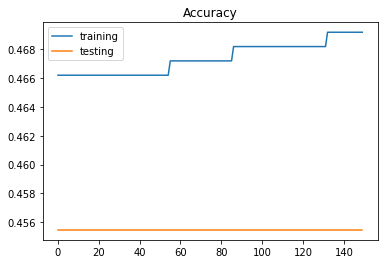


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-05


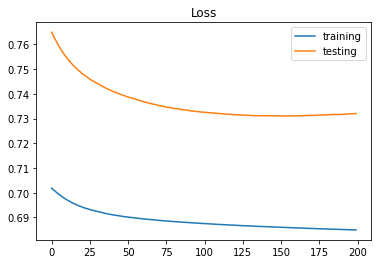

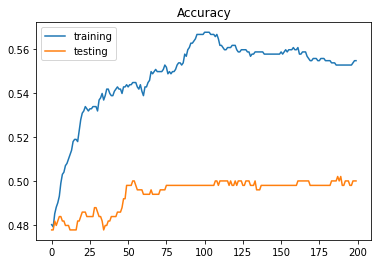


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-06


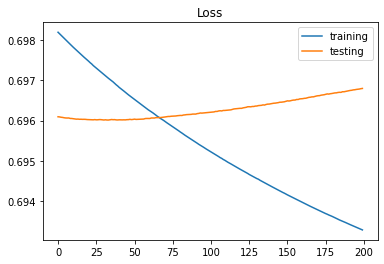

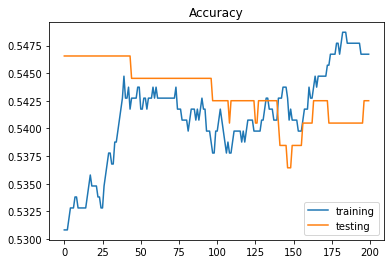


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-07


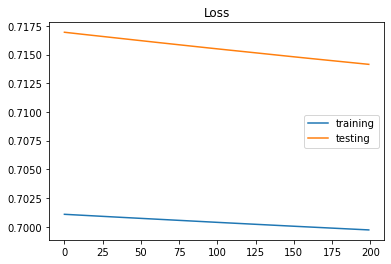

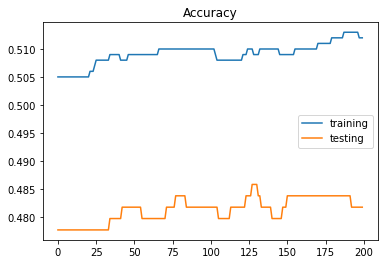


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-05


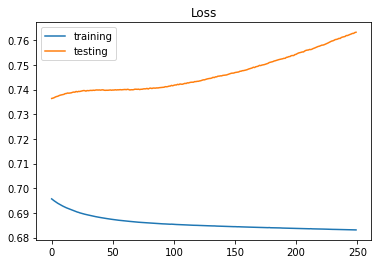

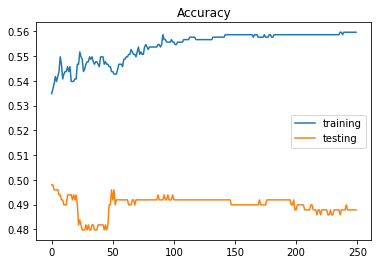


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-06


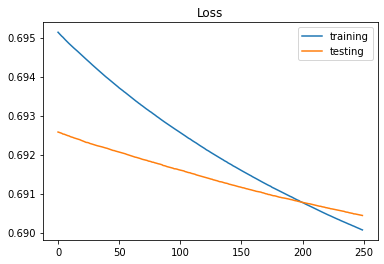

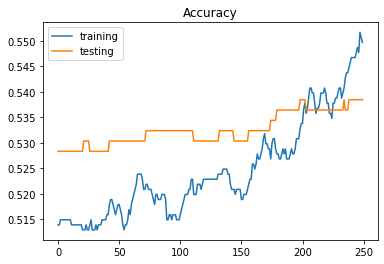


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-07


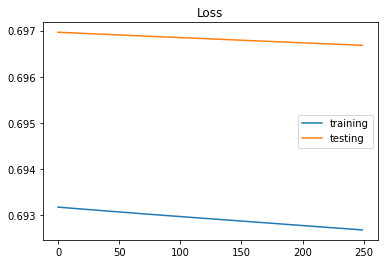

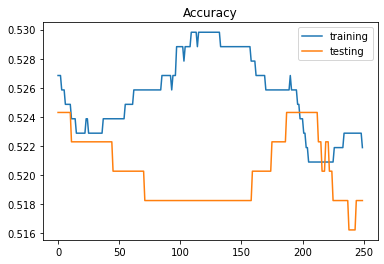


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-05


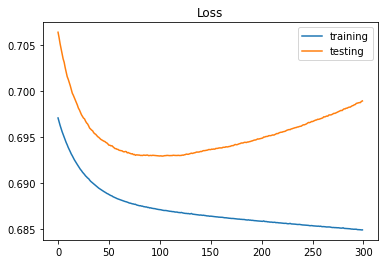

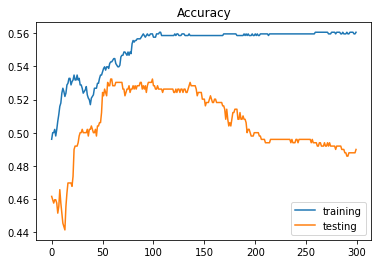


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-06


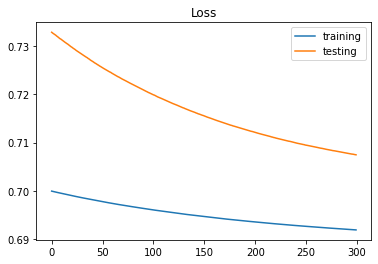

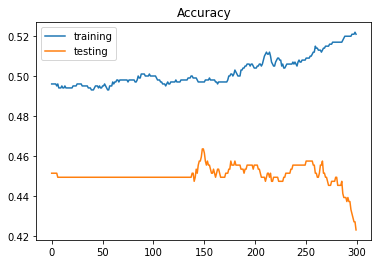


-----------------------------------------------------------------------

Number of Hidden Nodes = 100
Learning rate = 1e-07


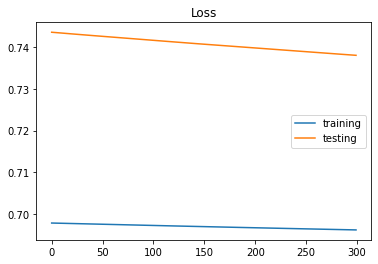

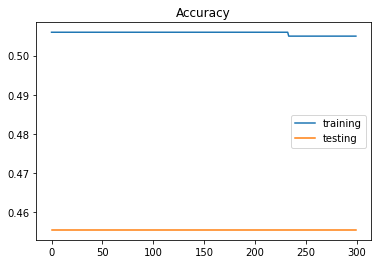


-----------------------------------------------------------------------



In [125]:
for c in range(len(results2)):
    print("Number of Epochs = " + str(results2[c][1]) + "\nLearning rate = " + str(results2[c][2]))
    plt.title("Loss", loc='center')
    plt.plot(results2[c][0].history['loss'], label='training')
    plt.plot(results2[c][0].history['val_loss'], label='testing')
    plt.legend()
    plt.show()
    
    plt.title("Accuracy", loc='center')
    plt.plot(results2[c][0].history['accuracy'], label='training')
    plt.plot(results2[c][0].history['val_accuracy'], label='testing')
    plt.legend()
    plt.show()
    
    print("\n-----------------------------------------------------------------------\n")

150 epochs
lr 1e-5
hdn = 40

250 epochs
lr 1e-6
hdn = 40

In [132]:
learning_rate = 1e-5
hidden = 40
epochs = 250

i = Input(shape=(T,D))
c = 0

x = LSTM(hidden)(i) 
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr=learning_rate), #hyper parameter
    metrics=['accuracy']
)
r = model.fit(
    X_train, 
    y_train,
    epochs = epochs, 
    batch_size = 32,
    validation_data = (X_test, y_test)
)
results3 = [r, hdn, l]
c += 1

Epoch 1/250
32/32 [==============================] - 2s 16ms/step - loss: 0.6963 - accuracy: 0.4924 - val_loss: 0.6905 - val_accuracy: 0.5283
Epoch 2/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6986 - accuracy: 0.4870 - val_loss: 0.6905 - val_accuracy: 0.5324
Epoch 3/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6972 - accuracy: 0.4985 - val_loss: 0.6905 - val_accuracy: 0.5324
Epoch 4/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.5177 - val_loss: 0.6905 - val_accuracy: 0.5324
Epoch 5/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.5114 - val_loss: 0.6905 - val_accuracy: 0.5324
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5162 - val_loss: 0.6904 - val_accuracy: 0.5324
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4977 - val_loss: 0.6905 - val_accuracy: 0.5344
Epoch 8/250


Epoch 59/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5251 - val_loss: 0.6895 - val_accuracy: 0.5344
Epoch 60/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5589 - val_loss: 0.6895 - val_accuracy: 0.5304
Epoch 61/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5616 - val_loss: 0.6894 - val_accuracy: 0.5364
Epoch 62/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5462 - val_loss: 0.6894 - val_accuracy: 0.5364
Epoch 63/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.5585 - val_loss: 0.6894 - val_accuracy: 0.5304
Epoch 64/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.5559 - val_loss: 0.6894 - val_accuracy: 0.5364
Epoch 65/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5486 - val_loss: 0.6894 - val_accuracy: 0.5304
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5607 - val_loss: 0.6876 - val_accuracy: 0.5385
Epoch 174/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.5549 - val_loss: 0.6876 - val_accuracy: 0.5385
Epoch 175/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5935 - val_loss: 0.6876 - val_accuracy: 0.5385
Epoch 176/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.5706 - val_loss: 0.6876 - val_accuracy: 0.5385
Epoch 177/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5555 - val_loss: 0.6876 - val_accuracy: 0.5385
Epoch 178/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.5755 - val_loss: 0.6876 - val_accuracy: 0.5385
Epoch 179/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5411 - val_loss: 0.6876 - val_accuracy: 0.5385
Epoch 180/250

Number of Epochs = 250
Learning rate = 1e-05
Number of Hidden Nodes = 40


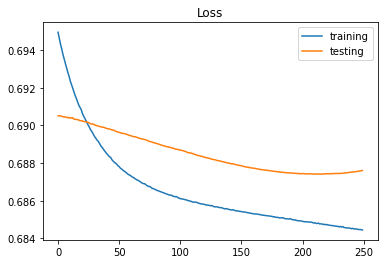

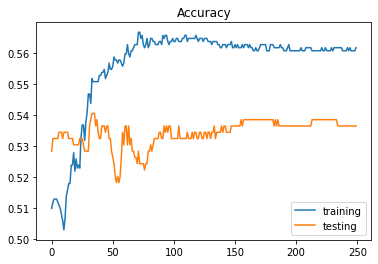

In [133]:
print("Number of Epochs = " + str(epochs) + "\nLearning rate = " + str(learning_rate) + "\nNumber of Hidden Nodes = " + str(hidden))
plt.title("Loss", loc='center')
plt.plot(results3[0].history['loss'], label='training')
plt.plot(results3[0].history['val_loss'], label='testing')
plt.legend()
plt.show()

plt.title("Accuracy", loc='center')
plt.plot(results3[0].history['accuracy'], label='training')
plt.plot(results3[0].history['val_accuracy'], label='testing')
plt.legend()
plt.show()